Hunter Bennett  
Glass Lab  
Created 171205 | Last updated 171206  
____________  
We want to compare the results of our amln diet RNA Seq results with the CCL4 diet RNASeq Results

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import subprocess
import os
import sys
import glob
import re

# import user defined packages
sys.path.insert(0, '/home/h1bennet/scripts')
import hbUtils

# plot matplotlib plots in notebook
%matplotlib inline

# load extension for running R from python
%load_ext rpy2.ipython

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: package ‘methods’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 2: package ‘datasets’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 3: package ‘utils’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6

In [104]:
# define path to data
datapath = {'kupffer':'/data/mm10/Kupffer/RNA/', 'liver': '/data/mm10/Liver/RNA/'}

# define output directory
outdir = '/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/'
if not os.path.isdir(outdir):
    subprocess.call(['mkdir', outdir])

# define samples for both whole liver and kupffer
samples = {'kupffer':["aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12",
"aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12",
"aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12",
"aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12",
"aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13a_16_12_16",
"aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13b_16_12_16",
"balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12a_JSSTDT_16_12_12",
"balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16",
"balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16",
"balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12b_JSSTDT_16_12_12",
"balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16",
"balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16",
"NCoRWT_Kupffer_RNA_polyA_CCl4_6wk_NoActD_LN156dM_JSS_TDT_16_06_06",
"NCoRWT_Kupffer_RNA_polyA_CCl4_6wk_NoActD_LN159aM_JSS_TDT_16_06_06",
"NCoRWT_Kupffer_RNA_polyA_CCl4_6wk_NoActD_LN159bM_JSS_TDT_16_06_06",
"NCoRWT_Tim4LowKupffer_RNA_polyA_CCl4_6week_LN156dM_JSS_16_06_06",
"NCoRWT_Tim4LowKupffer_RNA_polyA_CCl4_6week_LN159aM_JSS_16_06_06",
"NCoRWT_Tim4LowKupffer_RNA_polyA_CCl4_6week_LN159bM_JSS_16_06_06",
"aj_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_AJ11A_TDT_JSS_17_03_10",
"aj_Tim4PosKupffer_RNA_polyA_Control14weeksOld_AJ11B_16_12_08",
"balbc_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_Balb11A_TDT_JSS_17_03_10",
"balbc_Tim4PosKupffer_RNA_polyA_Control14weeksOld_Balb11B_JSSTDT_16_12_08",
"NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN246cM_JSS_TDT_17_01_13",
"NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN247aM_JSS_TDT_17_01_13"],
'liver':["aj_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_aj10_TDT_JSS_20160531",
"aj_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_aj5_TDT_JSS_20160610",
"aj_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_aj7_TDT_JSS_20160531",
"balbc_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_balb10_TDT_JSS_20160531",
"balbc_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_balb12_TDT_JSS_20160531",
"balbc_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_balb5_TDT_JSS_20160610",
"NCoRWT_WholeLiver_RNA_polyA_CCl4_6wk_NoActD_LN156dM_JSS_TDT_16_06_06",
"NCoRWT_WholeLiver_RNA_polyA_CCl4_6wk_NoActD_LN159aM_JSS_TDT_16_06_06",
"NCoRWT_WholeLiver_RNA_polyA_CCl4_6wk_NoActD_LN159bM_JSS_TDT_16_06_06",
"NCoRWT_WholeLiver_RNA_polyA_MCDControlDiet_6wk_LN47bM_JSS_15_12_01",
"NCoRWT_WholeLiver_RNA_polyA_MCDControlDiet_6wk_LN47cM_JSS_15_12_01",
"NCoRWT_WholeLiver_RNA_polyA_MCDControlDiet_6wk_LN47dM_JSS_15_12_01",
"NCoRWT_WholeLiver_RNA_polyA_MCDControlDiet_6wk_LN55bM_JSS_15_12_03",
"aj_WholeLiver_RNA_polyA_ControlDiet_21week_AJ7A_TDT_JSS_16_08_29.aj.star_shifted_from_AJ.sam",
"aj_WholeLiver_RNA_polyA_ControlDiet_21week_AJ7C_TDT_JSS_16_09_15.aj.star_shifted_from_AJ.sam",
"aj_WholeLiver_RNA_polyA_ControlDiet_21week_AJ7D_TDT_JSS_16_09_15.aj.star_shifted_from_AJ.sam",
"balbc_WholeLiver_RNA_polyA_ControlDiet_21week_BALB7A_JSS_TDT_16_08_29.balbcj.star_shifted_from_BALBCJ.sam",
"balbc_WholeLiver_RNA_polyA_ControlDiet_21week_BALB7B_JSS_TDT_16_09_15.balbcj.star_shifted_from_BALBCJ.sam",
"balbc_WholeLiver_RNA_polyA_ControlDiet_21week_BALB7D_JSS_TDT_16_09_15.balbcj.star_shifted_from_BALBCJ.sam"]}

bad_samples = {'LN140D': 'cancer', 'LN136B': 'cancer', 'LN148B': 'cancer',
              'LN144A': 'cancer', 'LN144C': 'cancer', 'LN182B': 'cancer',
              'LN182B': 'cancer', 'LN203B': 'cancer', 'BALB3A': 'splenomegaly',
              'BALB4D': 'hyper-fibrosis', 'LN148B': 'cancer', 'LN166A': 'cancer'}

We have Tim4 positive and negative samples in our collection, however in this case we want to analyze pooled Kupffer cells and compare them across diets.

In [105]:
samples_to_pool = [["aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12",
                   "aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12"],
                   ["aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12",
                   "aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12"],
                   # ["balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12a_JSSTDT_16_12_12", # these are not matched
                   # "balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12b_JSSTDT_16_12_12"],
                   ["balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16",
                   "balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16"],
                   ["balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16",
                   "balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16"],
                   ["NCoRWT_Kupffer_RNA_polyA_CCl4_6wk_NoActD_LN156dM_JSS_TDT_16_06_06",
                   "NCoRWT_Tim4LowKupffer_RNA_polyA_CCl4_6week_LN156dM_JSS_16_06_06"],
                   ["NCoRWT_Kupffer_RNA_polyA_CCl4_6wk_NoActD_LN159aM_JSS_TDT_16_06_06",
                   "NCoRWT_Tim4LowKupffer_RNA_polyA_CCl4_6week_LN159aM_JSS_16_06_06"],
                   ["NCoRWT_Kupffer_RNA_polyA_CCl4_6wk_NoActD_LN159bM_JSS_TDT_16_06_06",
                   "NCoRWT_Tim4LowKupffer_RNA_polyA_CCl4_6week_LN159bM_JSS_16_06_06"]]
                   

for a, b in samples_to_pool:
    # combine tag directories using homer makeTagDirectory command
    if not os.path.isdir(outdir + re.sub('[a-zA-Z0-9]*Kupffer', 'pooledKupffer', a)):
        subprocess.call(['makeTagDirectory',
                        outdir + re.sub('[a-zA-Z0-9]*Kupffer', 'pooledKupffer', a),
                         '-d', datapath['kupffer'] + a,
                         datapath['kupffer'] + b,])
    # remove tim4 specific samples from the list
    try:
        samples['kupffer'].remove(a)
        samples['kupffer'].remove(b)
    except ValueError:
        print('already removed samples:\n' + a + ' and\n' + b)
    if not re.sub('[a-zA-Z0-9]*Kupffer', 'pooledKupffer', a) in samples['kupffer']:
        samples['kupffer'].append(re.sub('[a-zA-Z0-9]*Kupffer', 'pooledKupffer', a))
                
# one more pass to clean up list
for i in list(samples['kupffer']):
    if re.match('.*Tim4.*CCl4.*', i):
        print(i + ' should be removed')
        try:
            samples['kupffer'].remove(i)
        except ValueError:
            print('already removed samples')

aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13a_16_12_16 should be removed
aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13b_16_12_16 should be removed
balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12a_JSSTDT_16_12_12 should be removed
balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12b_JSSTDT_16_12_12 should be removed


In [196]:
# define sample data frame
samplesDF = pd.DataFrame([s for groups in samples.values() for s in groups], columns = ['subject'])
samplesDF['sample_type'] = ['liver' if 'WholeLiver' in name else 'kupffer' for name in samplesDF.subject]
samplesDF['path'] = [outdir + s if 'pooled' in s else datapath[key] + s for key in datapath.keys() for s in samples[key]]
samplesDF['path']
samplesDF['batch'] = pd.factorize(samplesDF.subject\
             .str.replace('-','_')\
             .str.findall(r'(\d+_\d+_\d+)').str[0])[0]
samplesDF['strain'] = [j.replace('-', '_').split('_')[0].lower() for j in samplesDF.subject]
samplesDF['diet'] = ['ccl4' if 'CCl4' in name else 'control' for name in samplesDF.subject]
samplesDF['group'] = samplesDF.strain + '-' + samplesDF.diet
samplesDF['group_tissue'] = samplesDF.strain + '-' + samplesDF.diet + '-' + samplesDF.sample_type
samplesDF['exclusion'] = samplesDF.subject.str.contains('|'.join(bad_samples.keys()),
                                                       flags=re.IGNORECASE)
samplesDF_full = samplesDF

In [121]:
# set colors for the samples
color_dict = {'aj-control':'#fb9a99', 'aj-ccl4':'#e31a1c',
              'balbc-control':'#a6cee3', 'balbc-ccl4':'#1f78b4',
              'ncorwt-control':'#b2df8a', 'ncorwt-ccl4':'#33a02c'}
color_dict_tissue = {'aj-control-kupffer':'#fb9a99', 'aj-ccl4-kupffer':'#e31a1c',
            'balbc-control-kupffer':'#a6cee3', 'balbc-ccl4-kupffer':'#1f78b4',
            'ncorwt-control-kupffer':'#b2df8a', 'ncorwt-ccl4-kupffer':'#33a02c',
            'aj-control-liver':'#fdae6b', 'aj-ccl4-liver':'#e6550d',
            'balbc-control-liver':'#bcbddc', 'balbc-ccl4-liver':'#756bb1',
            'ncorwt-control-liver':'#bdbdbd', 'ncorwt-ccl4-liver':'#737373'}
samplesDF['color'] = [color_dict[group] for group in samplesDF.group]

#### Anotate the RNA Seq Samples using python wrapper for annotateRepeats from the Homer package

In [122]:
# set analyses we want to do
analyses = [('genes', False, None),
            ('genes', True, None),
            # ('genes', 'False', 'rlog'), # ignore the rlog transform values for now
            ('genes', False, 'rpkm'),
            ('exons', False, None),
            ('exons', True, None),
            # ('exons', 'False', 'rlog'), # ignore the rlog transform values for now
            ('exons', False, 'rpkm')]

In [123]:
# run annotate repeats with set of analysis options
for count_type, raw, norm in analyses:
    
    # generate file name
    filename = outdir + '/rnaseq_matrix_ccl4_' + count_type
    if raw:
        filename += '_raw'
    if norm != None:
        filename += ('_'+ str(norm))
    filename += '.txt'
    
    # run annotate repeats
    if not os.path.isfile(filename):
        out, err = hbUtils.run_annotateRepeats(samplesDF.path,
                countType=count_type, raw=raw, norm=norm)
        f = open(filename, 'w')
        f.write(out.decode('utf-8'))
        f.close()
        print(err.decode('utf-8'))

	Tag Directories:
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_AJ11A_TDT_JSS_17_03_10
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_Control14weeksOld_AJ11B_16_12_08
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_Balb11A_TDT_JSS_17_03_10
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_Control14weeksOld_Balb11B_JSSTDT_16_12_08
		/data/mm10/Kupffer/RNA/NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN246cM_JSS_TDT_17_01_13
		/data/mm10/Kupffer/RNA/NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN247aM_JSS_TDT_17_01_13
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/aj_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/aj_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/balbc_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16
		/home/h1bennet/liverStrai

	Tag Directories:
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_AJ11A_TDT_JSS_17_03_10
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_Control14weeksOld_AJ11B_16_12_08
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_Balb11A_TDT_JSS_17_03_10
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_Control14weeksOld_Balb11B_JSSTDT_16_12_08
		/data/mm10/Kupffer/RNA/NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN246cM_JSS_TDT_17_01_13
		/data/mm10/Kupffer/RNA/NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN247aM_JSS_TDT_17_01_13
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/aj_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/aj_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/balbc_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16
		/home/h1bennet/liverStrai

	Tag Directories:
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_AJ11A_TDT_JSS_17_03_10
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_Control14weeksOld_AJ11B_16_12_08
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_Balb11A_TDT_JSS_17_03_10
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_Control14weeksOld_Balb11B_JSSTDT_16_12_08
		/data/mm10/Kupffer/RNA/NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN246cM_JSS_TDT_17_01_13
		/data/mm10/Kupffer/RNA/NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN247aM_JSS_TDT_17_01_13
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/aj_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/aj_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/balbc_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16
		/home/h1bennet/liverStrai

	Tag Directories:
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_AJ11A_TDT_JSS_17_03_10
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_Control14weeksOld_AJ11B_16_12_08
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_Balb11A_TDT_JSS_17_03_10
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_Control14weeksOld_Balb11B_JSSTDT_16_12_08
		/data/mm10/Kupffer/RNA/NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN246cM_JSS_TDT_17_01_13
		/data/mm10/Kupffer/RNA/NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN247aM_JSS_TDT_17_01_13
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/aj_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/aj_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/balbc_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16
		/home/h1bennet/liverStrai

### PCA Analysis of the Data

#### First we need to get a tpm matrix so we can use that for plotting

In [221]:
# import rpkm counts as output by annotateRepeats
rpkm = pd.read_csv(outdir + '/rnaseq_matrix_ccl4_genes_rpkm.txt', sep='\t')

# Create column for gene
rpkm['Gene'] = pd.Series([x.split('|')[0] for x in rpkm['Annotation/Divergence']])

# clean up the columns a bit
pattern = r"\s+\(.+\)$"
rpkm.columns = pd.Series(rpkm.columns)\
        .str.replace(pattern, '')\
        .str.split('/')\
        .str[-1]
        
#subset matrix of only counts
rpkm_mat = rpkm.set_index('RepeatID')[rpkm.columns[
        rpkm.columns.to_series().str.contains('RNA')]]

# create tpm matrix
tpm_mat = rpkm_mat.apply(lambda x: x * (10**6)/x.sum())

In [127]:
# Import packages for PCA analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # uses SVD

# standardize matrix, mean=0, std=1
tpm_std = StandardScaler().fit_transform(tpm_mat)
# run PCA
pca = PCA(n_components=3)
tpm_pca = pca.fit_transform(tpm_std.T)
#create df for plotting
tpm_pca_df = pd.DataFrame(tpm_pca, columns=['PC1', 'PC2', 'PC3'],
        index=([samplesDF.group_tissue, samplesDF.subject])).reset_index()
tpm_pca_df['mouse'] = tpm_pca_df.subject.str.split('_').str[6]

In [128]:
# define function for labeling points
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

#### PCA of all CCl4 data 

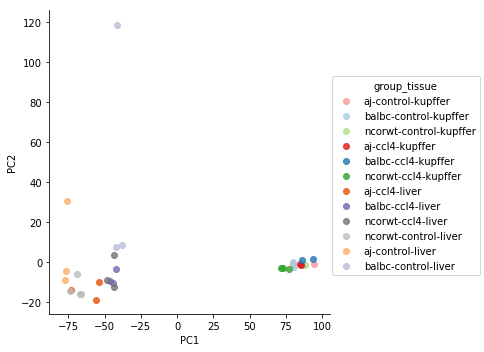

In [130]:
ax = sns.lmplot('PC1', 'PC2', tpm_pca_df, fit_reg=False, hue='group_tissue', palette=color_dict_tissue)
# label_point(tpm_pca_df.PC1, tpm_pca_df.PC2, tpm_pca_df.mouse, plt.gca())

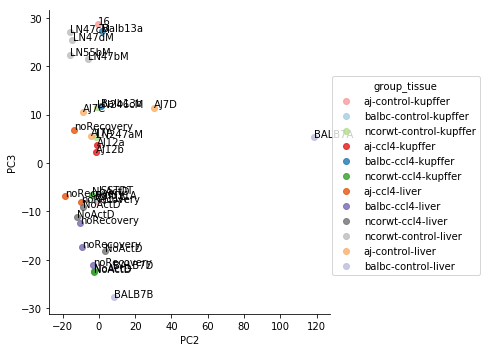

In [131]:
ax = sns.lmplot('PC2', 'PC3', tpm_pca_df, fit_reg=False, hue='group_tissue', palette=color_dict_tissue)
label_point(tpm_pca_df.PC2, tpm_pca_df.PC3, tpm_pca_df.mouse, plt.gca())

BALB7A appears to be an outlier, lets remove it from further analysis

In [234]:
bad_samples['BALB7A'] = 'outlier'
samplesDF = samplesDF[~samplesDF.subject.str.contains('BALB7A')].reset_index(drop=True)
tpm_mat = tpm_mat.loc[:, list(~pd.Series(tpm_mat.columns).str.contains('BALB7A'))]

# recalculate initial PCA
tpm_std = StandardScaler().fit_transform(tpm_mat)
# run PCA
pca = PCA(n_components=3)
tpm_pca = pca.fit_transform(tpm_std.T)
#create df for plotting
tpm_pca_df = pd.DataFrame(tpm_pca, columns=['PC1', 'PC2', 'PC3'],
        index=([samplesDF.group_tissue, samplesDF.subject])).reset_index()
tpm_pca_df['mouse'] = tpm_pca_df.subject.str.split('_').str[6]

### Consider implementing a 3D plot below
____
**TBD**

## Tissue specific PCA

In [224]:
def df_col_subset(x, id_str):
    import pandas as pd
    import re
    '''Returns pandas dataframe with only columns containing id_str'''
    return x[x.columns[pd.Series(x.columns).str.contains(id_str, flags=re.IGNORECASE)]]

### Whole Liver

In [226]:
# standardize matrix, mean=0, std=1
l_tpm = hbUtils.df_col_subset(tpm_mat, 'Liver')
l_tpm_std = StandardScaler().fit_transform(l_tpm) # scale data
# run PCA
l_pca = PCA(n_components=3)
l_pca.fit(l_tpm_std.T)
exp_var = l_pca.explained_variance_ratio_
l_tpm_pca = l_pca.fit_transform(l_tpm_std.T)
#create df for plotting
l_tpm_pca_df = pd.DataFrame(l_tpm_pca, columns=['PC1', 'PC2', 'PC3'],
        index=([samplesDF[samplesDF.sample_type=='liver'].group_tissue,
                        samplesDF[samplesDF.sample_type=='liver'].subject])).reset_index()
l_tpm_pca_df['mouse'] = l_tpm_pca_df.subject.str.split('_|-').str[6]

In [227]:
l_pca.explained_variance_ratio_

array([ 0.42804214,  0.21339559,  0.13924054])

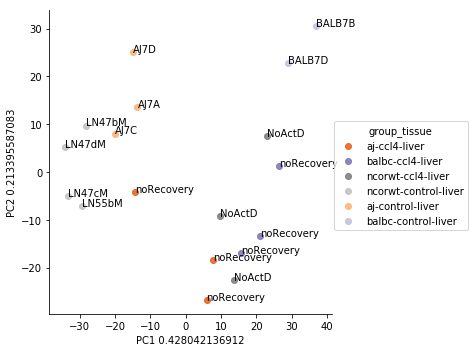

In [228]:
ax = sns.lmplot('PC1', 'PC2', l_tpm_pca_df, fit_reg=False,
           hue='group_tissue', palette=color_dict_tissue)
ax.set(xlabel=('PC1 ' + str(exp_var[0])), ylabel=('PC2 ' + str(exp_var[1])))
label_point(l_tpm_pca_df.PC1, l_tpm_pca_df.PC2, l_tpm_pca_df.mouse, plt.gca())

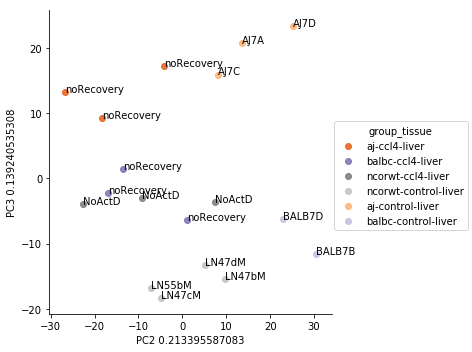

In [229]:
ax = sns.lmplot('PC2', 'PC3', l_tpm_pca_df, fit_reg=False,
           hue='group_tissue', palette=color_dict_tissue)
ax.set(xlabel=('PC2 ' + str(exp_var[1])), ylabel=('PC3 ' + str(exp_var[2])))
label_point(l_tpm_pca_df.PC2, l_tpm_pca_df.PC3, l_tpm_pca_df.mouse, plt.gca())

### Kupffer Cells

In [230]:
# standardize matrix, mean=0, std=1
k_tpm = hbUtils.df_col_subset(tpm_mat, 'Kupffer')
k_tpm_std = StandardScaler().fit_transform(k_tpm) # scale data
# run PCA
l_pca = PCA(n_components=3)
k_tpm_pca = l_pca.fit_transform(k_tpm_std.T)
#create df for plotting
k_tpm_pca_df = pd.DataFrame(k_tpm_pca, columns=['PC1', 'PC2', 'PC3'],
        index=([samplesDF[samplesDF.sample_type=='kupffer'].group_tissue,
                        samplesDF[samplesDF.sample_type=='kupffer'].subject])).reset_index()
k_tpm_pca_df['mouse'] = k_tpm_pca_df.subject.str.split('_|-').str[6]

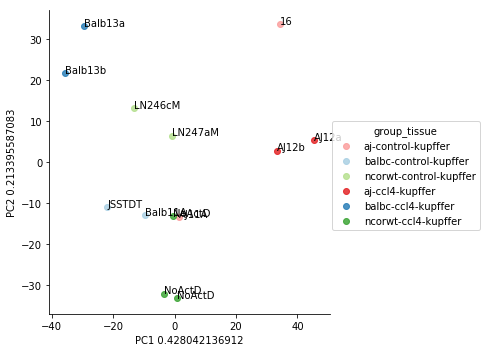

In [231]:
ax = sns.lmplot('PC1', 'PC2', k_tpm_pca_df, fit_reg=False,
           hue='group_tissue', palette=color_dict_tissue)
ax.set(xlabel=('PC1 ' + str(exp_var[0])), ylabel=('PC2 ' + str(exp_var[1])))
label_point(k_tpm_pca_df.PC1, k_tpm_pca_df.PC2, k_tpm_pca_df.mouse, plt.gca())

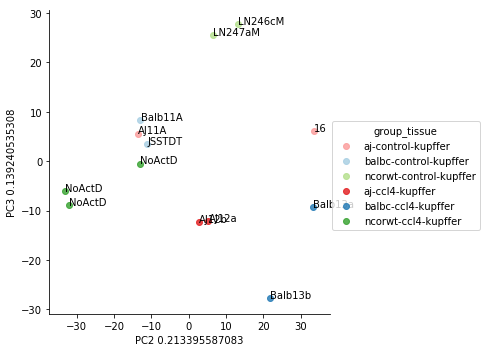

In [232]:
ax = sns.lmplot('PC2', 'PC3', k_tpm_pca_df, fit_reg=False,
           hue='group_tissue', palette=color_dict_tissue)
ax.set(xlabel=('PC2 ' + str(exp_var[1])), ylabel=('PC3 ' + str(exp_var[2])))
label_point(k_tpm_pca_df.PC2, k_tpm_pca_df.PC3, k_tpm_pca_df.mouse, plt.gca())

PC3 appears to be separating the data fairly well... can pretty much draw a line at 0 and see the separation of the CCl4 diet. Thats about 10% of the variance between the samples

### Heirachal clustering of samples

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


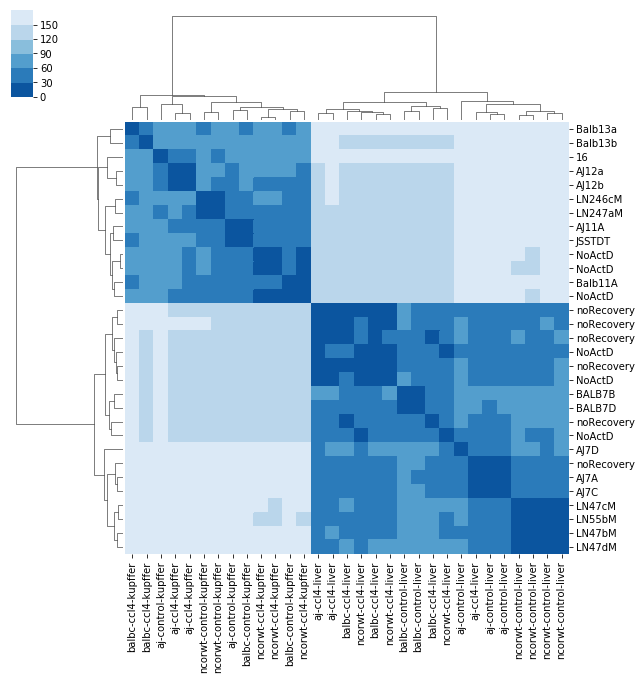

In [235]:
samplesDF['mouse'] = samplesDF.subject.str.split('_|-').str[6]
# calculate euclidean distance between samples
from scipy.spatial import distance
tpm_dist = pd.DataFrame(distance.squareform(distance.pdist(tpm_std.T, 'euclidean')),
                        columns = list(samplesDF.group_tissue),
                        index = list(samplesDF.mouse))
# plot values using sns clustermap - ignore error as we know we are putting in a distance mat
g = sns.clustermap(tpm_dist, cmap=sns.color_palette("Blues_r"))

## Differential Analysis (DESeq2)

Prep data for importing into R

In [237]:
# import the raw count file
raw_counts_file = '/rnaseq_matrix_ccl4_genes_raw.txt'
counts_df = pd.read_csv(outdir + raw_counts_file, sep='\t')

# drop samples that need to be excluded
to_drop = pd.Series(counts_df.columns).str.contains(
        '|'.join(bad_samples.keys()))
to_drop[0] = False
counts_df = counts_df.loc[:, list(~to_drop)]
counts_df.head()

# create gene name column
counts_df['Gene'] = pd.Series([x.split('|')[0] for x in counts_df['Annotation/Divergence']])

# clean up columns
counts_df.columns = pd.Series(counts_df.columns)\
        .str.split(r" \(").str[0]\
        .str.split('/.*/').str[-1]
counts_df = counts_df.set_index('Transcript/RepeatID')

# subset just the samples
counts_mat_l = hbUtils.df_col_subset(hbUtils.df_col_subset(counts_df, 'liver'), 'aj|balb|ncor')
counts_mat_k = hbUtils.df_col_subset(hbUtils.df_col_subset(counts_df, 'kupffer'), 'aj|balb|ncor')

#### Write the data for DESeq2

Liver

In [242]:
# Liver
# raw count matrix for DESeq
liver_raw_counts_file = raw_counts_file.replace('.txt', '_liver_mat_deseq.txt')                                    
if not os.path.isfile(outdir + liver_raw_counts_file):
    counts_mat_l.to_csv(outdir + liver_raw_counts_file, sep='\t')
    
# Column Data Information for DESeq, make sure to drop the samples we are excluding
col_data_l = samplesDF.loc[(samplesDF.sample_type=='liver') & ~samplesDF.exclusion,
                           ['subject', 'strain', 'diet', 'sample_type']]
col_data_l = col_data_l.set_index('subject')
liver_col_file = raw_counts_file.replace('.txt', 'liver_col_info.txt')
if not os.path.isfile(outdir + liver_col_file):
    col_data_l.to_csv(outdir + liver_col_file, sep='\t')

Kupffer cells

In [243]:
# raw count matrix for DESeq
kupffer_raw_counts_file = raw_counts_file.replace('.txt', '_kupffer_mat_deseq.txt')                                   
if not os.path.isfile(outdir + kupffer_raw_counts_file):
    counts_mat_l.to_csv(outdir + kupffer_raw_counts_file, sep='\t')

# Column Data Information for DESeq, make sure to drop the samples we are excluding
col_data_k = samplesDF.loc[(samplesDF.sample_type=='kupffer') & ~samplesDF.exclusion,
                           ['subject', 'strain', 'diet', 'sample_type']]
col_data_k = col_data_k.set_index('subject')
kupffer_col_file = raw_counts_file.replace('.txt', 'kupffer_col_info.txt')
if not os.path.isfile(outdir + kupffer_col_file):
    col_data_k.to_csv(outdir + kupffer_col_file, sep='\t')

In [338]:
col_data_k

,strain,diet,sample_type
subject,,,
aj_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_AJ11A_TDT_JSS_17_03_10,aj,control,kupffer
aj_Tim4PosKupffer_RNA_polyA_Control14weeksOld_AJ11B_16_12_08,aj,control,kupffer
balbc_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_Balb11A_TDT_JSS_17_03_10,balbc,control,kupffer
balbc_Tim4PosKupffer_RNA_polyA_Control14weeksOld_Balb11B_JSSTDT_16_12_08,balbc,control,kupffer
NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN246cM_JSS_TDT_17_01_13,ncorwt,control,kupffer
NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN247aM_JSS_TDT_17_01_13,ncorwt,control,kupffer
aj_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12,aj,ccl4,kupffer
aj_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12,aj,ccl4,kupffer
balbc_pooledKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16,balbc,ccl4,kupffer


### Analyze Kupffer Cell Data

#### Run DESeq2 with interaction model
____
This is following the DESeq manual for how to model interactions. See online documentation or enter '?results' in R with DESeq2 package loaded.

In [343]:
%%R -i counts_mat_k,col_data_k,outdir
# load DESeq
library("DESeq2")

# adjust factors to ensure that we are comparing ccl4 to control
col_data_k$diet <- relevel(col_data_k$diet, ref="control")
# set ncorwt as baseline
col_data_k$strain <- relevel(col_data_k$strain, ref="ncorwt")

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_k,
                             colData = col_data_k,
                             design = ~ strain + diet + strain:diet)

# adjust factors to ensure that we are comparing ccl4 to control
dds$diet <- relevel(dds$diet, ref="control")
# set ncorwt as baseline
dds$strain <- relevel(dds$strain, ref="ncorwt")

# run DESeq with full model
dds <- DESeq(dds)

# diet effect for ncorwt
res <- results(dds, contrast=c('diet', 'ccl4', 'control'), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/ncorwt_ccl4_deseq_results.txt"))

# diet effect for balbc
res <- results(dds, contrast=list( c('diet_ccl4_vs_control','strainbalbc.dietccl4') ), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_ccl4_deseq_results.txt"))

# diet effect for aj
res <- results(dds, contrast=list( c('diet_ccl4_vs_control','strainaj.dietccl4') ), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_ccl4_deseq_results.txt"))

# interaction term for condition effect between balbc and ncorwt
res <- results(dds, name='strainbalbc.dietccl4', alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_ncorwt_ccl4_interaction_deseq_results.txt"))

# interaction term for condition effect between aj and ncorwt
res <- results(dds, name='strainaj.dietccl4', alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_ncorwt_ccl4_interaction_deseq_results.txt"))

# interaction term for condition effect between balbc and aj
res <- results(dds, contrast=list("strainbalbc.dietccl4", "strainaj.dietccl4"), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_aj_ccl4_interaction_deseq_results.txt"))

### BALBC differentially regulated genes

In [344]:
def intersect(list1, list2):
    return list(set(list1) & set(list2))

In [345]:
balb_ccl4 = pd.read_csv(outdir + "/balbc_ccl4_deseq_results.txt")
balb_aj = pd.read_csv(outdir + "/balbc_aj_ccl4_interaction_deseq_results.txt")
balb_ncor = pd.read_csv(outdir + "/balbc_ncorwt_ccl4_interaction_deseq_results.txt")

In [346]:
# combine into one DF
balb = balb_ccl4.merge(balb_aj.merge(balb_ncor, how='outer', on='Unnamed: 0',
                                    suffixes=('_balb_aj', '_balb_ncor')),
                      how='outer', on='Unnamed: 0')

Next, to start analyzing this data, we will ask how many of the differentially induced genes in balbc by the amln diet are also differentially induced in balb compared to aj

In [347]:
balb_aj_spec = ((np.abs(balb.log2FoldChange) >= 1) & (balb.padj <=0.05) & (balb.padj_balb_aj <= 0.05))
balb_aj_spec.value_counts()

False    35340
True       405
dtype: int64

In [348]:
balb_ncor_spec = ((np.abs(balb.log2FoldChange) >= 1) & (balb.padj <=0.05) & (balb.padj_balb_ncor <= 0.05))
balb_ncor_spec.value_counts()

False    34650
True      1095
dtype: int64

In [349]:
((balb_aj_spec) & (balb_ncor_spec)).value_counts()

False    35467
True       278
dtype: int64

^ thus all 19 of the balb/aj specific genes are balb ncor specific genes

In [350]:
balb_spec_refseq = balb.loc[((balb_aj_spec) & (balb_ncor_spec)), 'Unnamed: 0']

Lets plot their expression...

In [351]:
# load in rpkm file without adjustments
rpkm_genes_raw = pd.read_csv(outdir + '/rnaseq_matrix_ccl4_genes_rpkm.txt', sep='\t')

# drop the balb3A columns
to_drop = pd.Series(counts_df.columns).str.contains(
        '|'.join(bad_samples.keys()))
to_drop[0] = False
rpkm_genes_raw = rpkm_genes_raw.loc[:, list(~to_drop)]

# generate tissue specific rpkm files for plotting
rpkm_genes_raw_k= hbUtils.df_col_subset(rpkm_genes_raw,
        'chr|start|end|strand|Length|Copies|Annotation|.*Kupffer.*')
rpkm_genes_raw_l= hbUtils.df_col_subset(rpkm_genes_raw,
        'chr|start|end|strand|Length|Copies|Annotation|.*Liver.*')

In [352]:
balb_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(balb_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

### Kupffer Cell Expression of Balbc specific genes

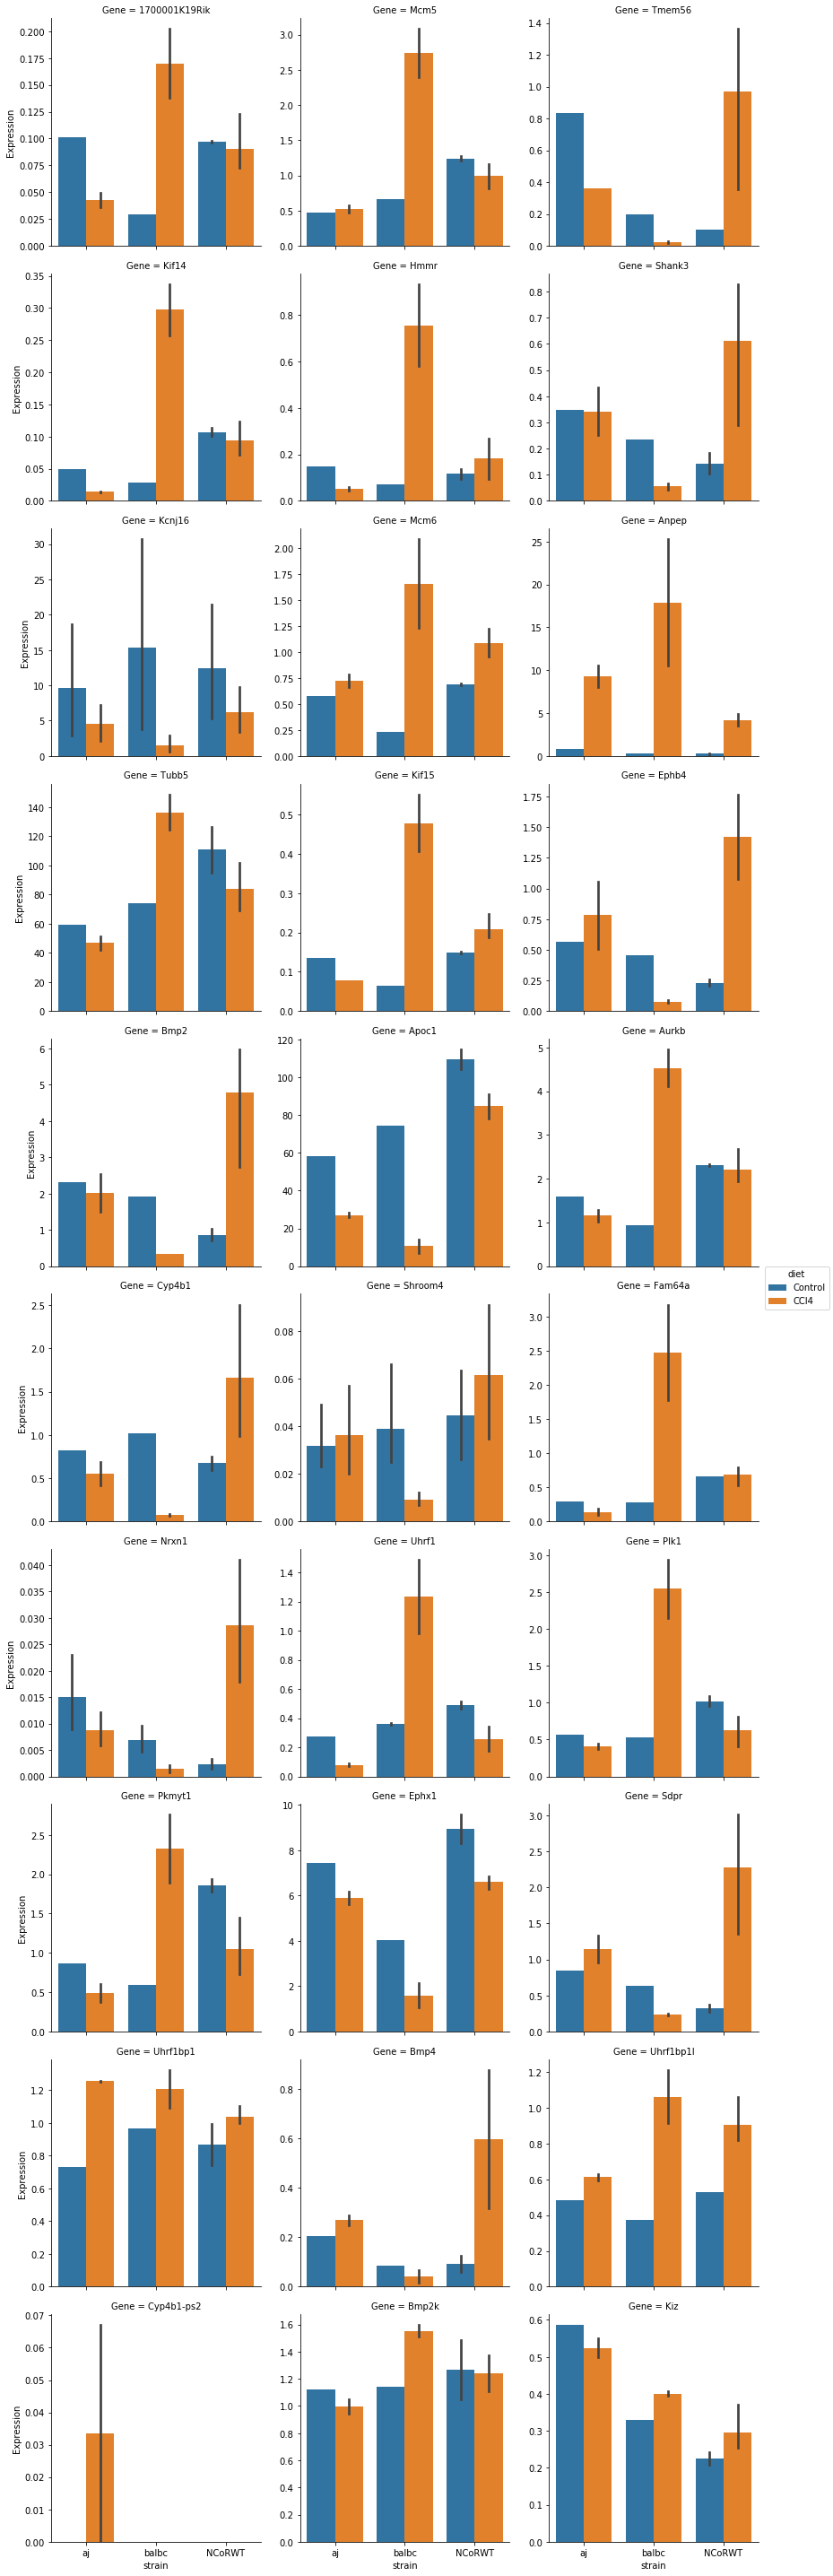

In [355]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join(balb_spec_genes[:24]))

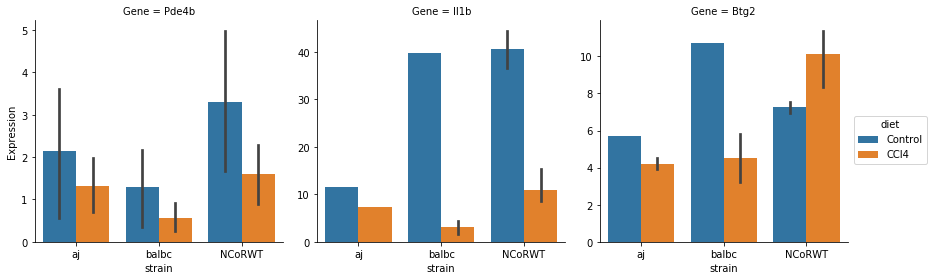

In [397]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join(['il1b\|', 'btg2', 'pde4b']))

### Whole Liver Expression of Balbc specific genes

Could not assign subject groups, using Sample IDs


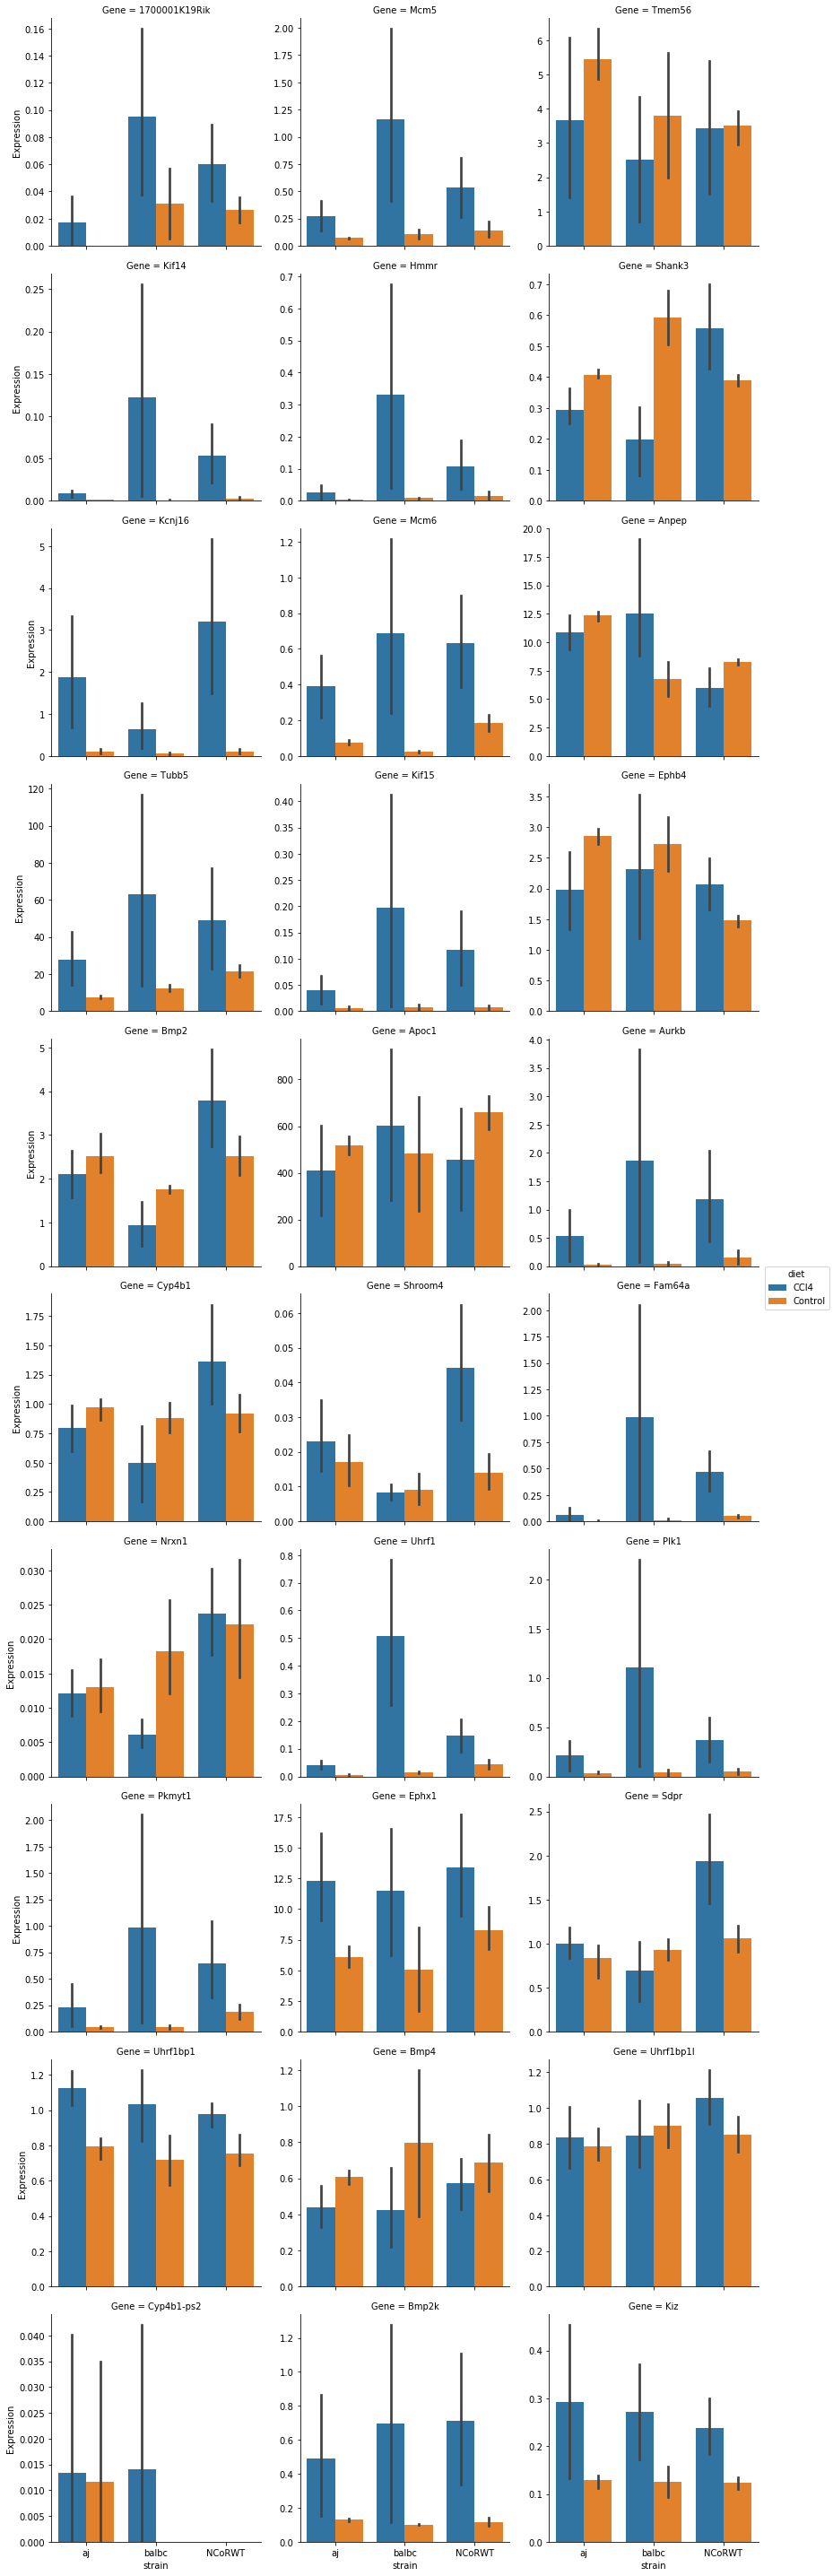

In [356]:
importlib.reload(hbUtils)
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join(balb_spec_genes[:24]))

Unclear how to exactly interpret the above gene expression differences. interesting that the inflammatory gene Il1b would be increased in balb given that they do not have the inflammatory phenotype that we see in the other mice livers.  
**Jason wants to see if these genes are conserved in the strain specific response to CCl4.**

### AJ differentially regulated genes

In [329]:
aj_ccl4 = pd.read_csv(outdir + "/aj_ccl4_deseq_results.txt")
aj_balb = pd.read_csv(outdir + "/balbc_aj_ccl4_interaction_deseq_results.txt")
aj_ncor = pd.read_csv(outdir + "/aj_ncorwt_ccl4_interaction_deseq_results.txt")

In [330]:
# combine into one DF
aj = aj_ccl4.merge(aj_balb.merge(aj_ncor, how='outer', on='Unnamed: 0',
                                    suffixes=('_aj_balb', '_aj_ncor')),
                      how='outer', on='Unnamed: 0')

In [331]:
aj_balb_spec = ((np.abs(aj.log2FoldChange) >= 1) & (aj.padj <=0.05) & (aj.padj_aj_balb <= 0.05))
aj_balb_spec.value_counts()

False    35640
True       105
dtype: int64

In [332]:
aj_ncor_spec = ((np.abs(aj.log2FoldChange) >= 1) & (aj.padj <=0.05) & (aj.padj_aj_ncor <= 0.05))
aj_ncor_spec.value_counts()

False    35288
True       457
dtype: int64

In [333]:
((aj_balb_spec) & (aj_ncor_spec)).value_counts()

False    35708
True        37
dtype: int64

In [334]:
# aj specific refseq ids
aj_spec_refseq = aj.loc[((aj_balb_spec) & (aj_ncor_spec)), 'Unnamed: 0']

# Get aj spec gene names
aj_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(aj_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

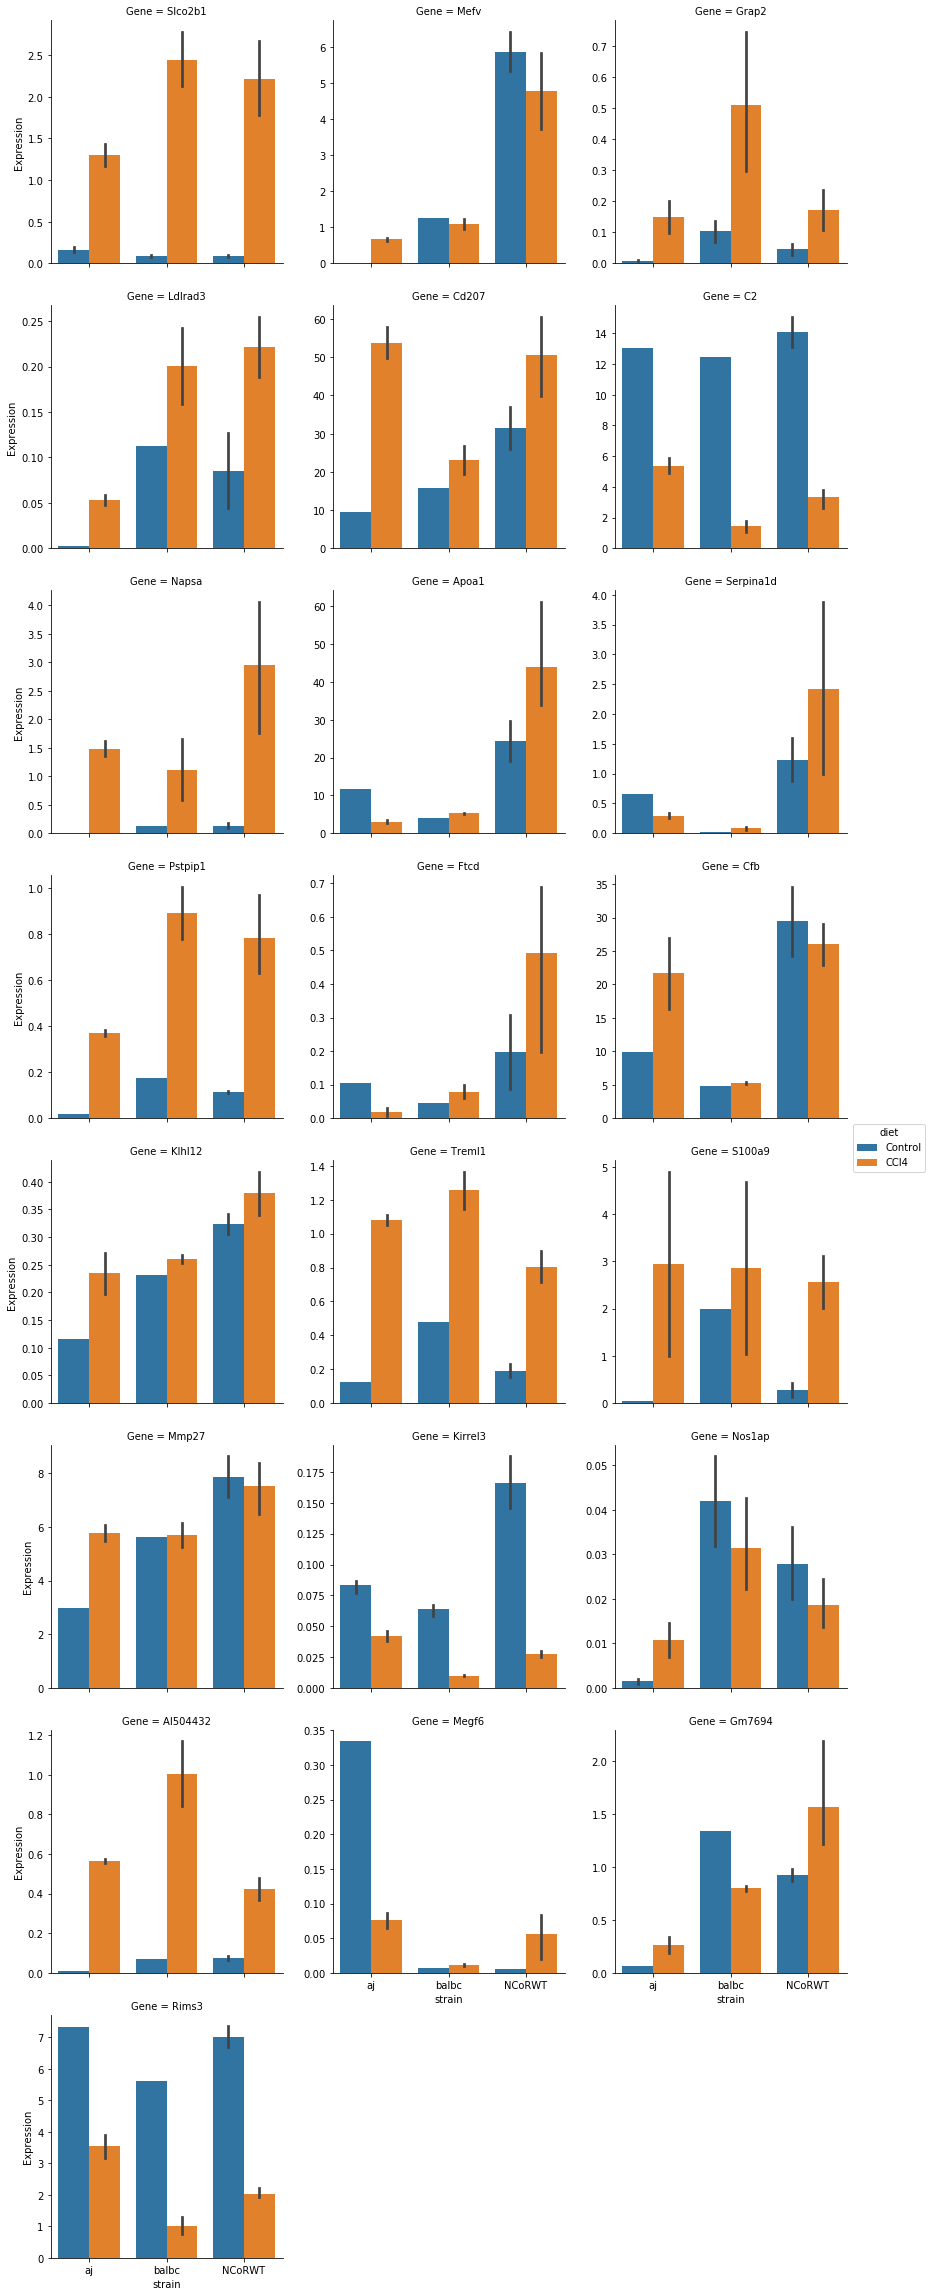

In [335]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + aj_spec_genes + '\|'))

Could not assign subject groups, using Sample IDs


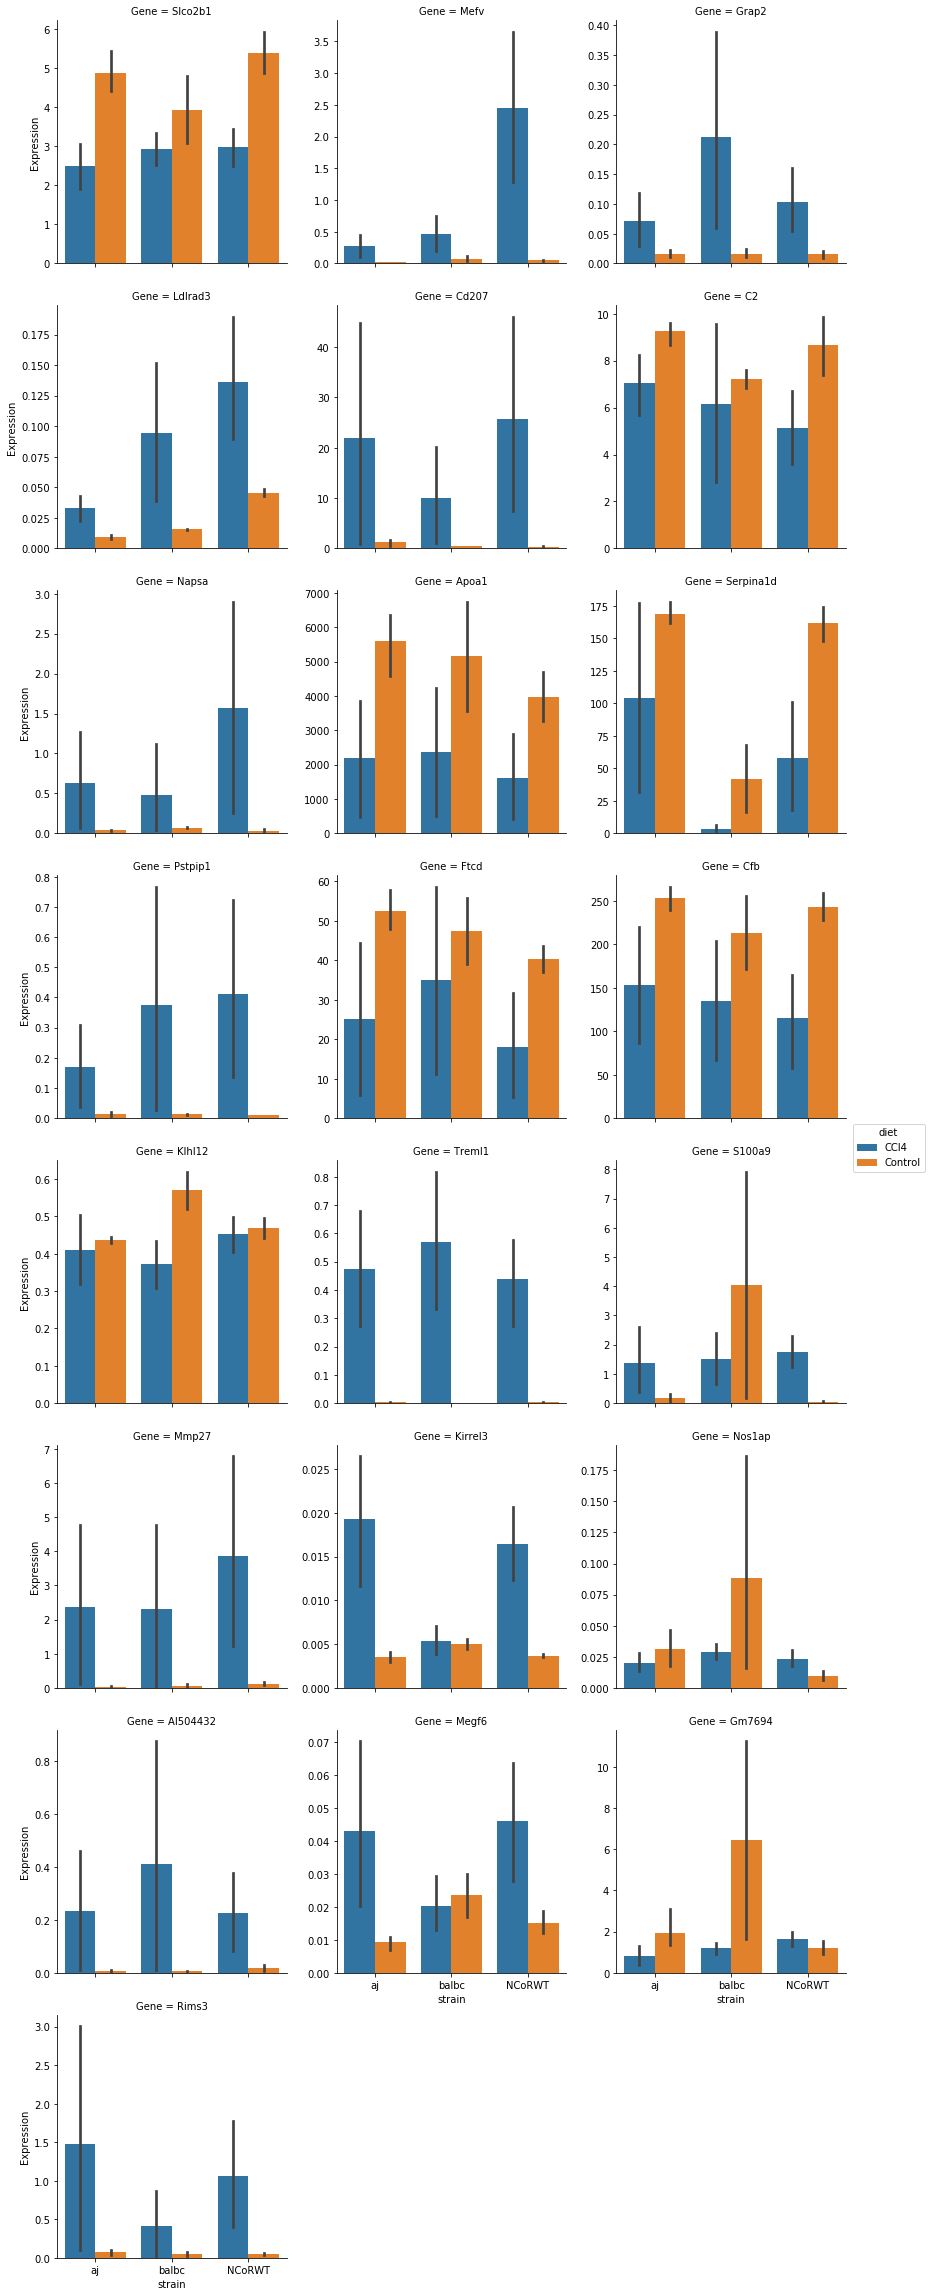

In [336]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + aj_spec_genes + '\|'))

### NCoRWT (C57/BL6) differentially regulated genes

In [359]:
ncorwt_ccl4 = pd.read_csv(outdir + "/ncorwt_ccl4_deseq_results.txt")
ncorwt_aj = pd.read_csv(outdir + "/aj_ncorwt_ccl4_interaction_deseq_results.txt")
ncorwt_balb = pd.read_csv(outdir + "/balbc_ncorwt_ccl4_interaction_deseq_results.txt")

In [360]:
# combine into one DF
ncorwt = ncorwt_ccl4.merge(ncorwt_balb.merge(ncorwt_aj, how='outer', on='Unnamed: 0',
                                             suffixes=('_ncorwt_balb', '_ncorwt_aj')),
                           how='outer', on='Unnamed: 0')

In [361]:
ncorwt_balb_spec = ((np.abs(ncorwt.log2FoldChange) >= 1) & (ncorwt.padj <=0.05) & (ncorwt.padj_ncorwt_balb <= 0.05))
ncorwt_balb_spec.value_counts()

False    33598
True      2147
dtype: int64

In [362]:
ncorwt_aj_spec = ((np.abs(ncorwt.log2FoldChange) >= 1) & (ncorwt.padj <=0.05) & (ncorwt.padj_ncorwt_aj <= 0.05))
ncorwt_aj_spec.value_counts()

False    33556
True      2189
dtype: int64

In [363]:
(ncorwt_aj_spec & ncorwt_balb_spec).value_counts()

False    34268
True      1477
dtype: int64

In [364]:
# ncorwt specific refseq ids
ncorwt_spec_refseq = ncorwt.loc[((ncorwt_balb_spec) & (ncorwt_aj_spec)), 'Unnamed: 0']

# Get ncorwt spec gene names
ncorwt_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(ncorwt_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

#### Kupffer cell expression

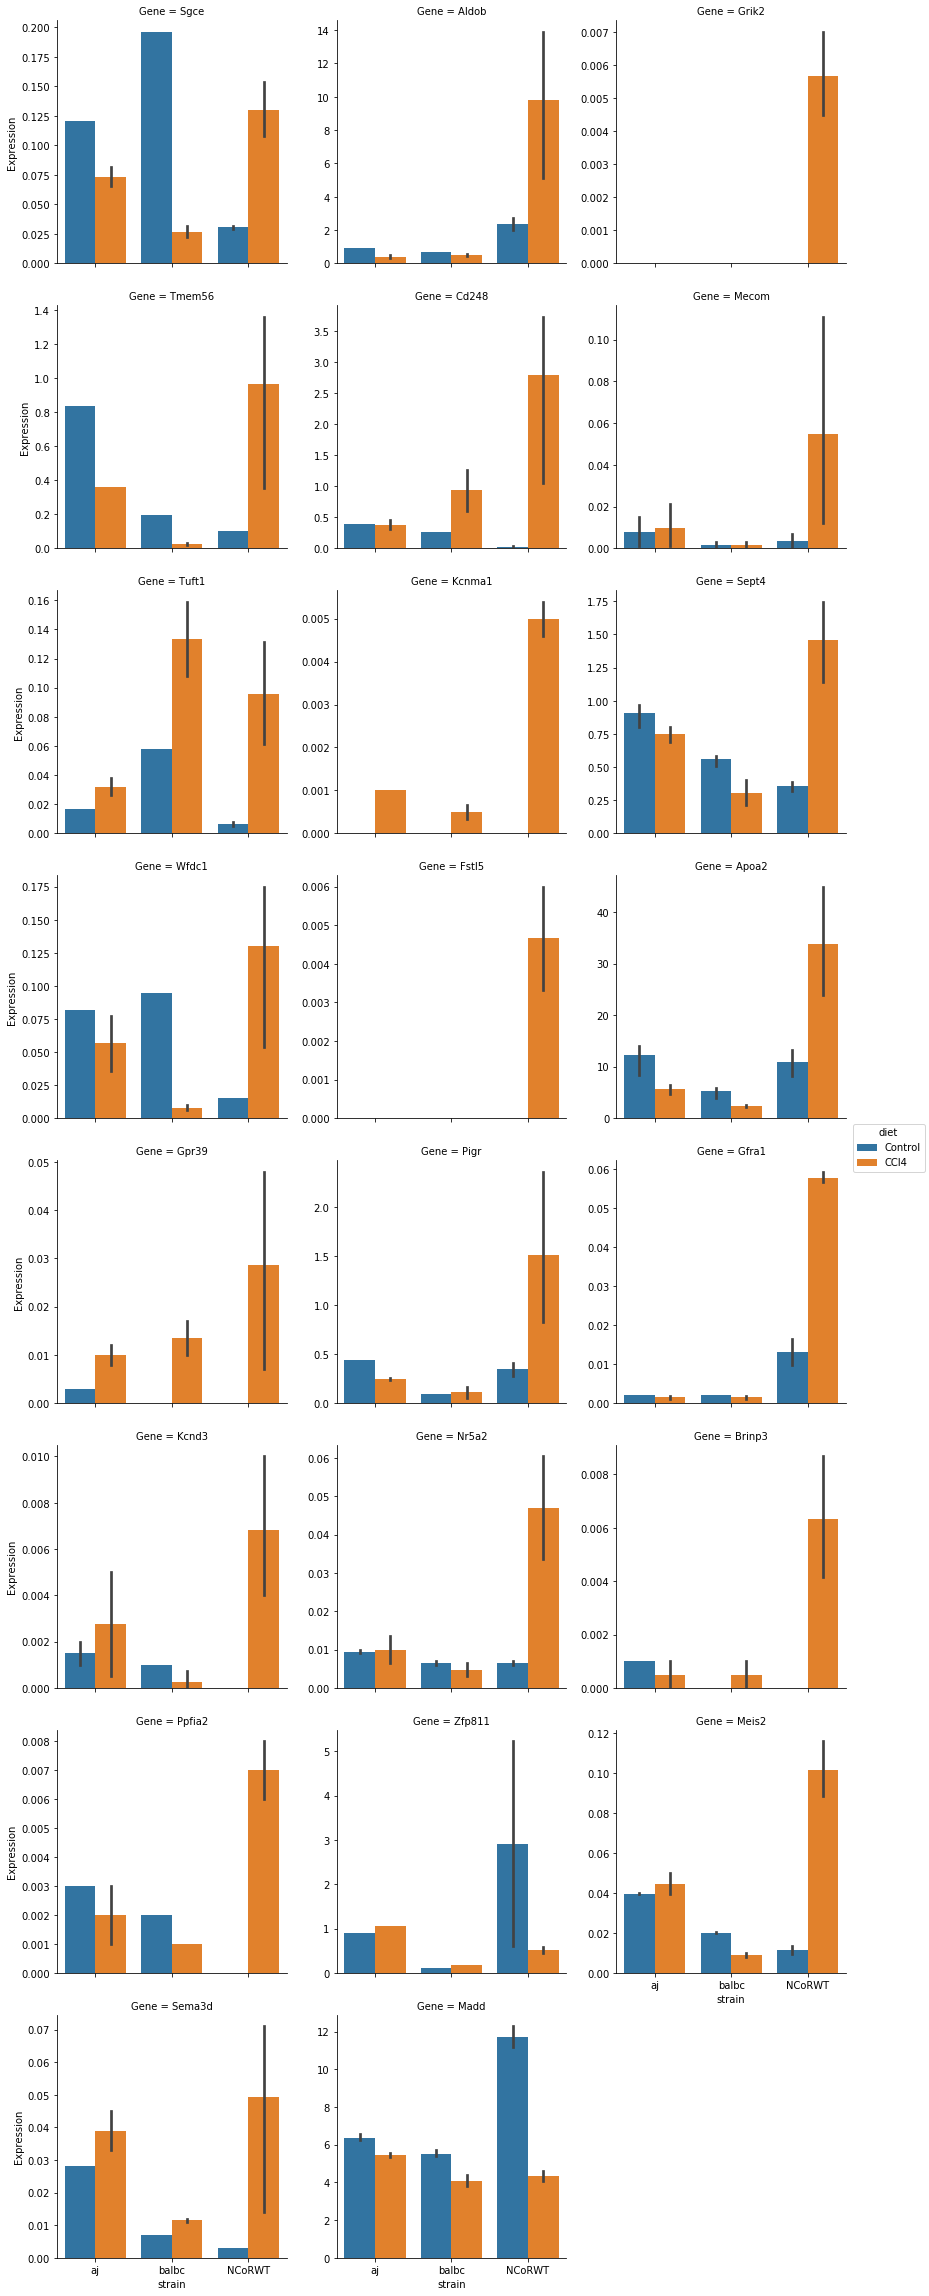

In [365]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + ncorwt_spec_genes[:24] + '\|'))

#### liver expression


Could not assign subject groups, using Sample IDs


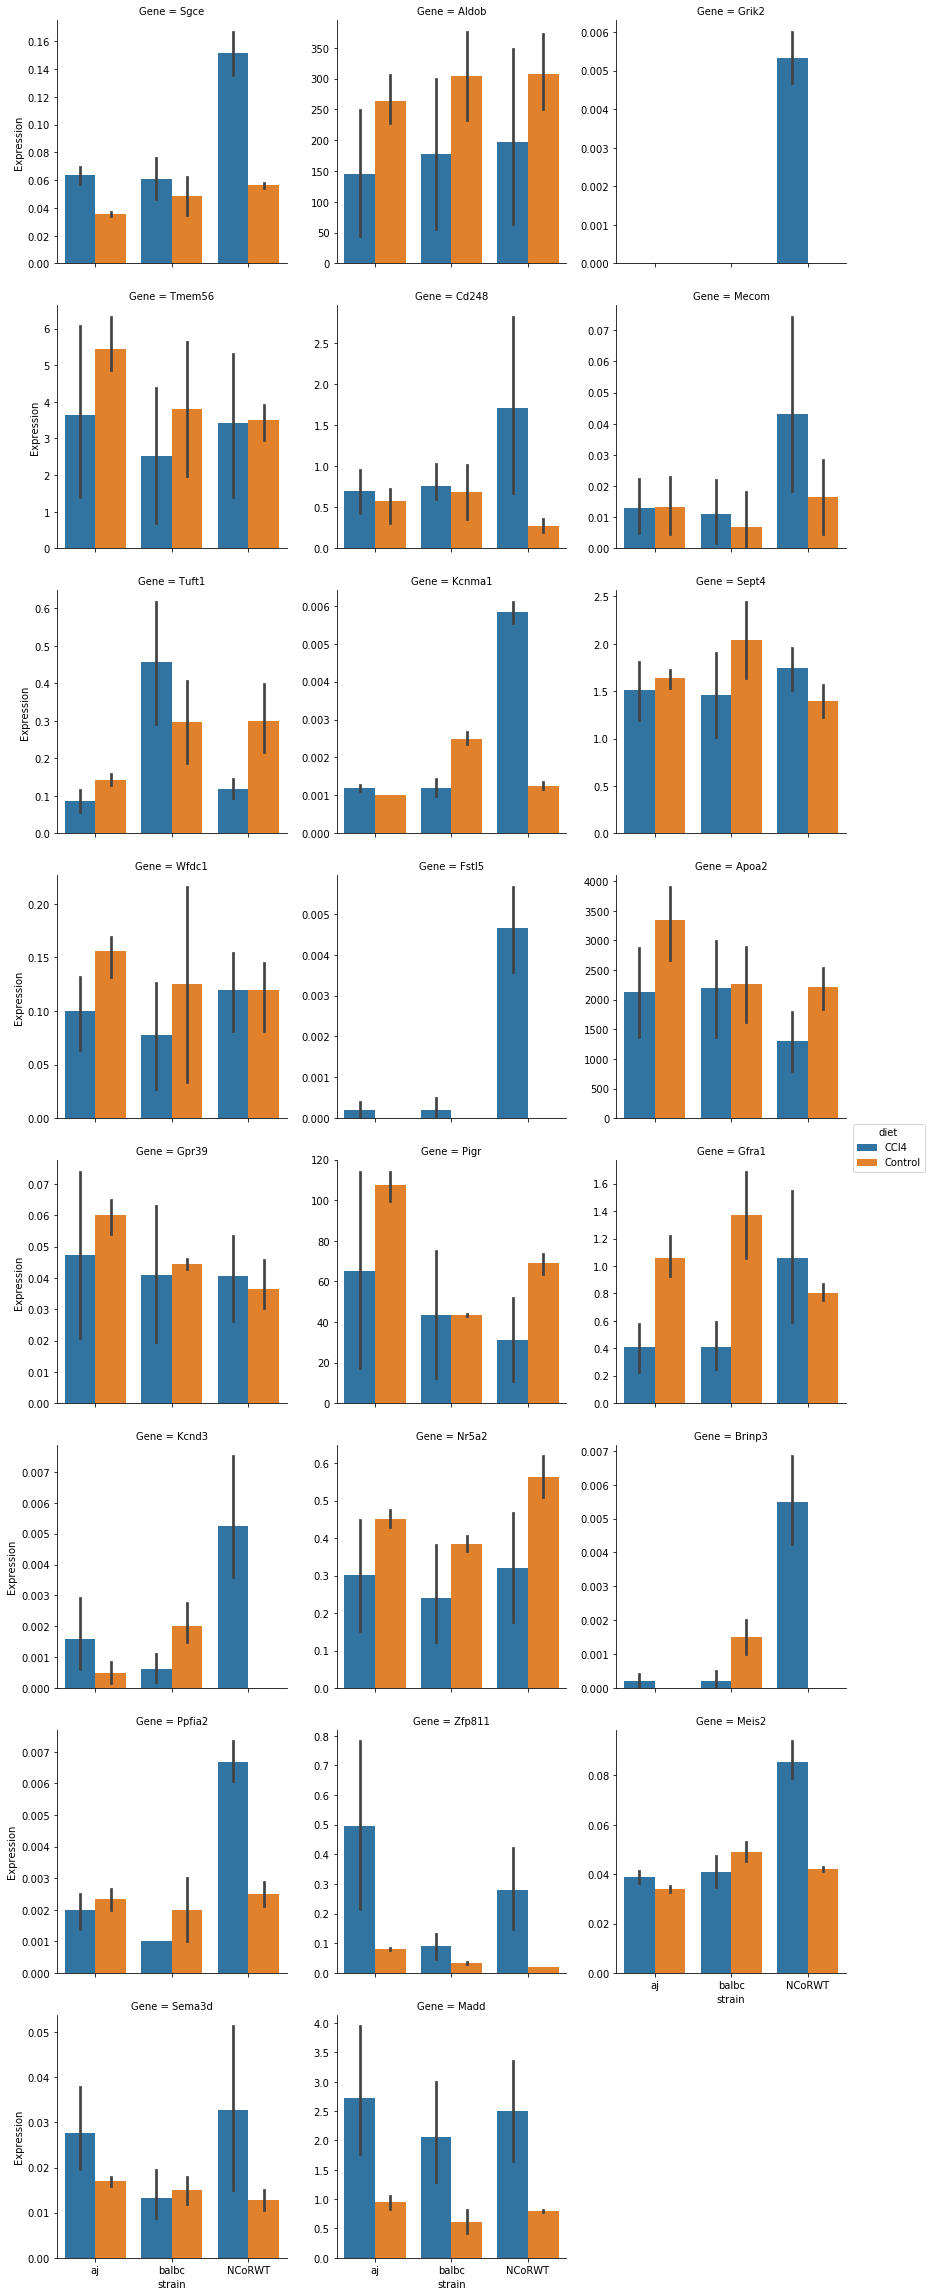

In [366]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + ncorwt_spec_genes[:24] + '\|'))

## Analyze Whole Liver RNA Seq Data 

In [369]:
%%R -i counts_mat_l,col_data_l,outdir
# load DESeq
library("DESeq2")

colnames(counts_mat_l) <- NULL

# adjust factors to ensure that we are comparing ccl4 to control
col_data_l$diet <- relevel(col_data_l$diet, ref='control')
col_data_l$strain <- relevel(col_data_l$strain, ref='ncorwt')

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_l,
                             colData = col_data_l,
                             design = ~ strain + diet + strain:diet)

# run DESeq with full model
dds <- DESeq(dds)

resultsNames(dds)

# diet effect for ncorwt
res <- results(dds, contrast=c('diet', 'ccl4', 'control'), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/ncorwt_ccl4_wholeliver_deseq_results.txt"))

# diet effect for balbc
res <- results(dds, contrast=list( c('diet_ccl4_vs_control','strainbalbc.dietccl4') ), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_ccl4_wholeliver_deseq_results.txt"))

# diet effect for aj
res <- results(dds, contrast=list( c('diet_ccl4_vs_control','strainaj.dietccl4') ), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_ccl4_wholeliver_deseq_results.txt"))

# interaction term for condition effect between balbc and ncorwt
res <- results(dds, name='strainbalbc.dietccl4', alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_ncorwt_ccl4_interaction_wholeliver_deseq_results.txt"))

# interaction term for condition effect between aj and ncorwt
res <- results(dds, name='strainaj.dietccl4', alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_ncorwt_ccl4_interaction_wholeliver_deseq_results.txt"))

# interaction term for condition effect between balbc and aj
res <- results(dds, contrast=list("strainbalbc.dietccl4", "strainaj.dietccl4"), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_aj_ccl4_interaction_wholeliver_deseq_results.txt"))

### Analyze Balbc differential genes in the Whole Liver

In [370]:
balb_ccl4 = pd.read_csv(outdir + "/balbc_ccl4_wholeliver_deseq_results.txt")
balb_aj = pd.read_csv(outdir + "/balbc_aj_ccl4_interaction_wholeliver_deseq_results.txt")
balb_ncor = pd.read_csv(outdir + "/balbc_ncorwt_ccl4_interaction_wholeliver_deseq_results.txt")

In [371]:
# combine into one DF
balb = balb_ccl4.merge(balb_aj.merge(balb_ncor, how='outer', on='Unnamed: 0',
                                    suffixes=('_balb_aj', '_balb_ncor')),
                      how='outer', on='Unnamed: 0')

Next, to start analyzing this data, we will ask how many of the differentially induced genes in balbc by the amln diet are also differentially induced in balb compared to aj

In [372]:
balb_aj_spec = ((np.abs(balb.log2FoldChange) >= 1) & (balb.padj <=0.05) & (balb.padj_balb_aj <= 0.05))
balb_aj_spec.value_counts()

False    35575
True       170
dtype: int64

In [373]:
balb_ncor_spec = ((np.abs(balb.log2FoldChange) >= 1) & (balb.padj <=0.05) & (balb.padj_balb_ncor <= 0.05))
balb_ncor_spec.value_counts()

False    35274
True       471
dtype: int64

In [374]:
((balb_aj_spec) & (balb_ncor_spec)).value_counts()

False    35654
True        91
dtype: int64

^ thus all 19 of the balb/aj specific genes are balb ncor specific genes

In [375]:
balb_spec_refseq = balb.loc[((balb_aj_spec) & (balb_ncor_spec)), 'Unnamed: 0']

In [376]:
balb_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(balb_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

### Whole Liver Expression of Balbc specific genes

Could not assign subject groups, using Sample IDs


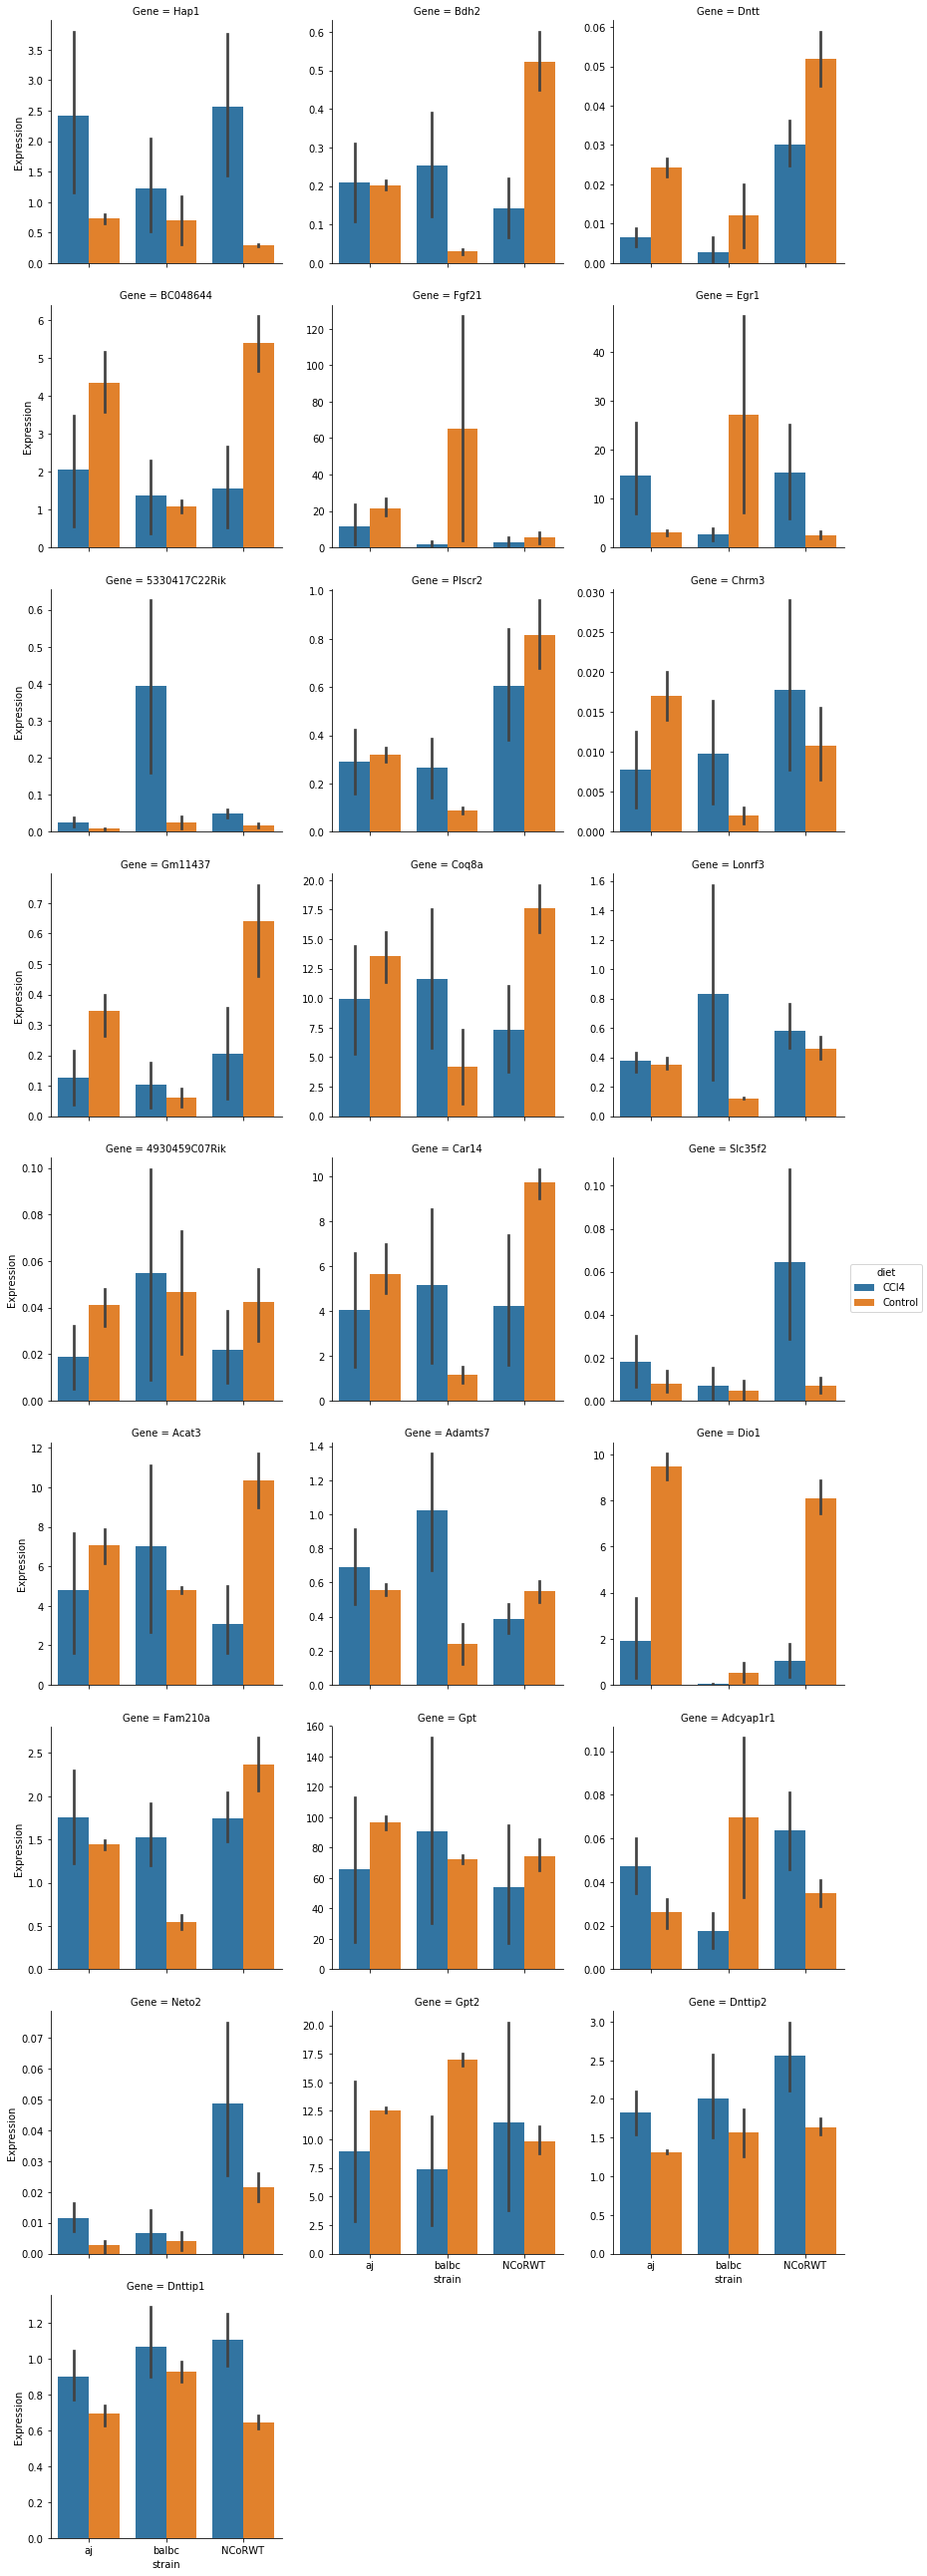

In [377]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + balb_spec_genes[:24]))

### Kuppfer cell Expression of Balbc Whole liver specific genes

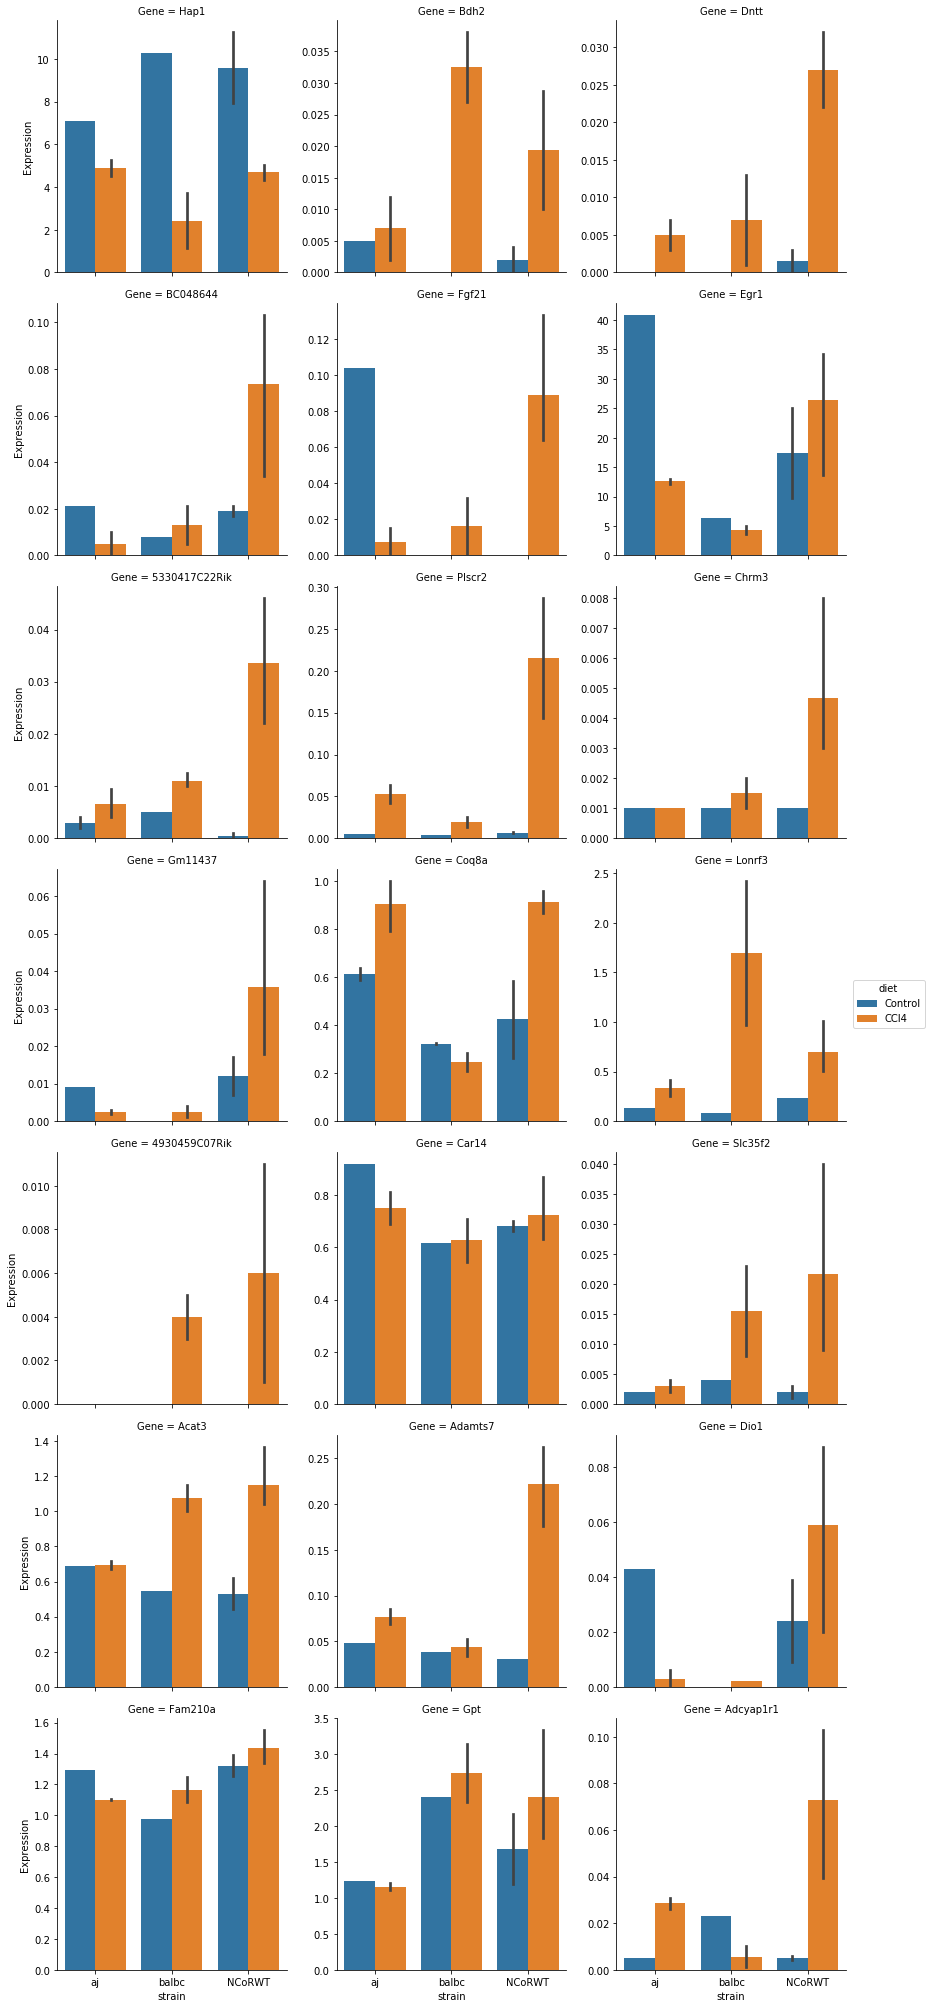

In [378]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + balb_spec_genes[:24] + '\|'))

### AJ differentially regulated genes

In [379]:
aj_ccl4 = pd.read_csv(outdir + "/aj_ccl4_wholeliver_deseq_results.txt")
aj_balb = pd.read_csv(outdir + "/balbc_aj_ccl4_interaction_wholeliver_deseq_results.txt")
aj_ncor = pd.read_csv(outdir + "/aj_ncorwt_ccl4_interaction_wholeliver_deseq_results.txt")

In [380]:
# combine into one DF
aj = aj_ccl4.merge(aj_balb.merge(aj_ncor, how='outer', on='Unnamed: 0',
                                    suffixes=('_aj_balb', '_aj_ncor')),
                      how='outer', on='Unnamed: 0')

In [381]:
aj_balb_spec = ((np.abs(aj.log2FoldChange) >= 1) & (aj.padj <=0.05) & (aj.padj_aj_balb <= 0.05))
aj_balb_spec.value_counts()

False    35663
True        82
dtype: int64

In [382]:
aj_ncor_spec = ((np.abs(aj.log2FoldChange) >= 1) & (aj.padj <=0.05) & (aj.padj_aj_ncor <= 0.05))
aj_ncor_spec.value_counts()

False    35430
True       315
dtype: int64

In [383]:
((aj_balb_spec) & (aj_ncor_spec)).value_counts()

False    35702
True        43
dtype: int64

In [384]:
# aj specific refseq ids
aj_spec_refseq = aj.loc[((aj_balb_spec) & (aj_ncor_spec)), 'Unnamed: 0']

# Get aj spec gene names
aj_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(aj_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

#### Plot Whole Liver Specific Genes

Could not assign subject groups, using Sample IDs


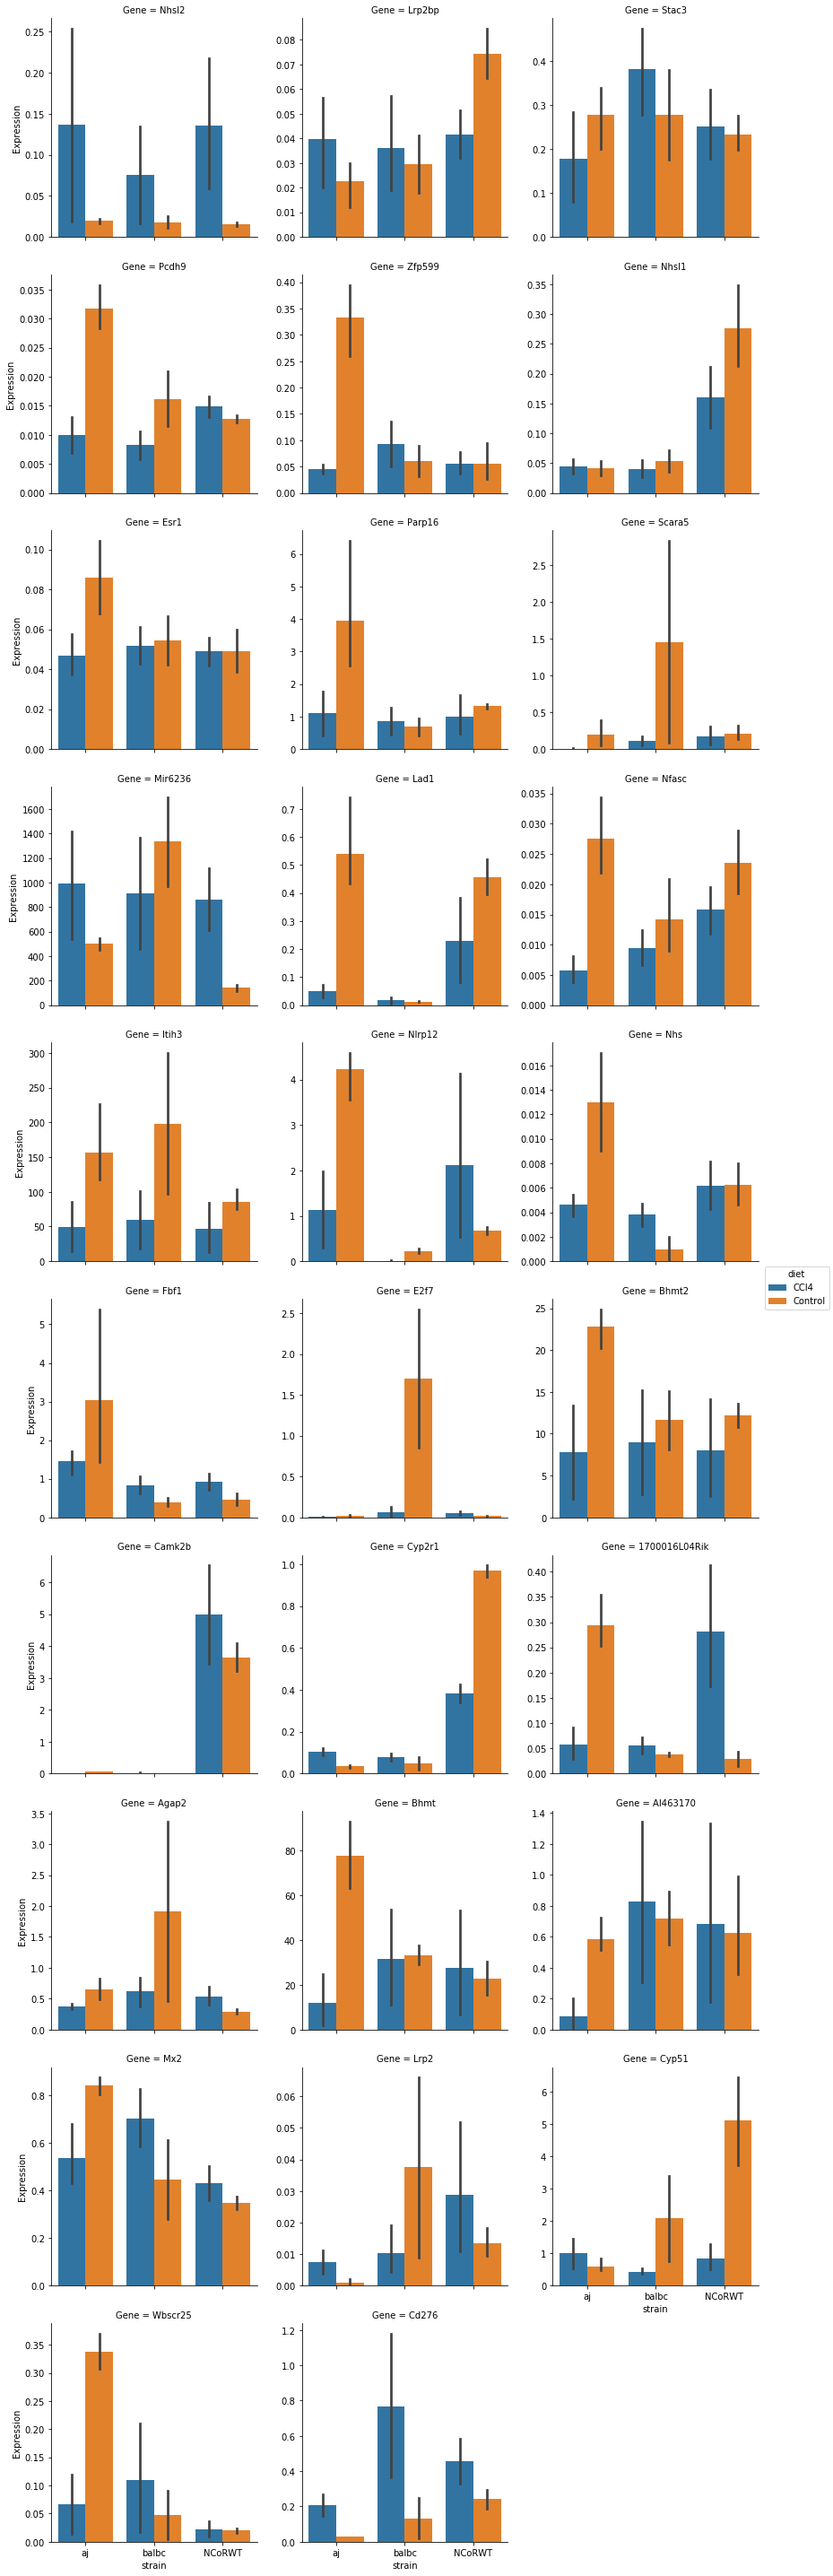

In [386]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + aj_spec_genes))

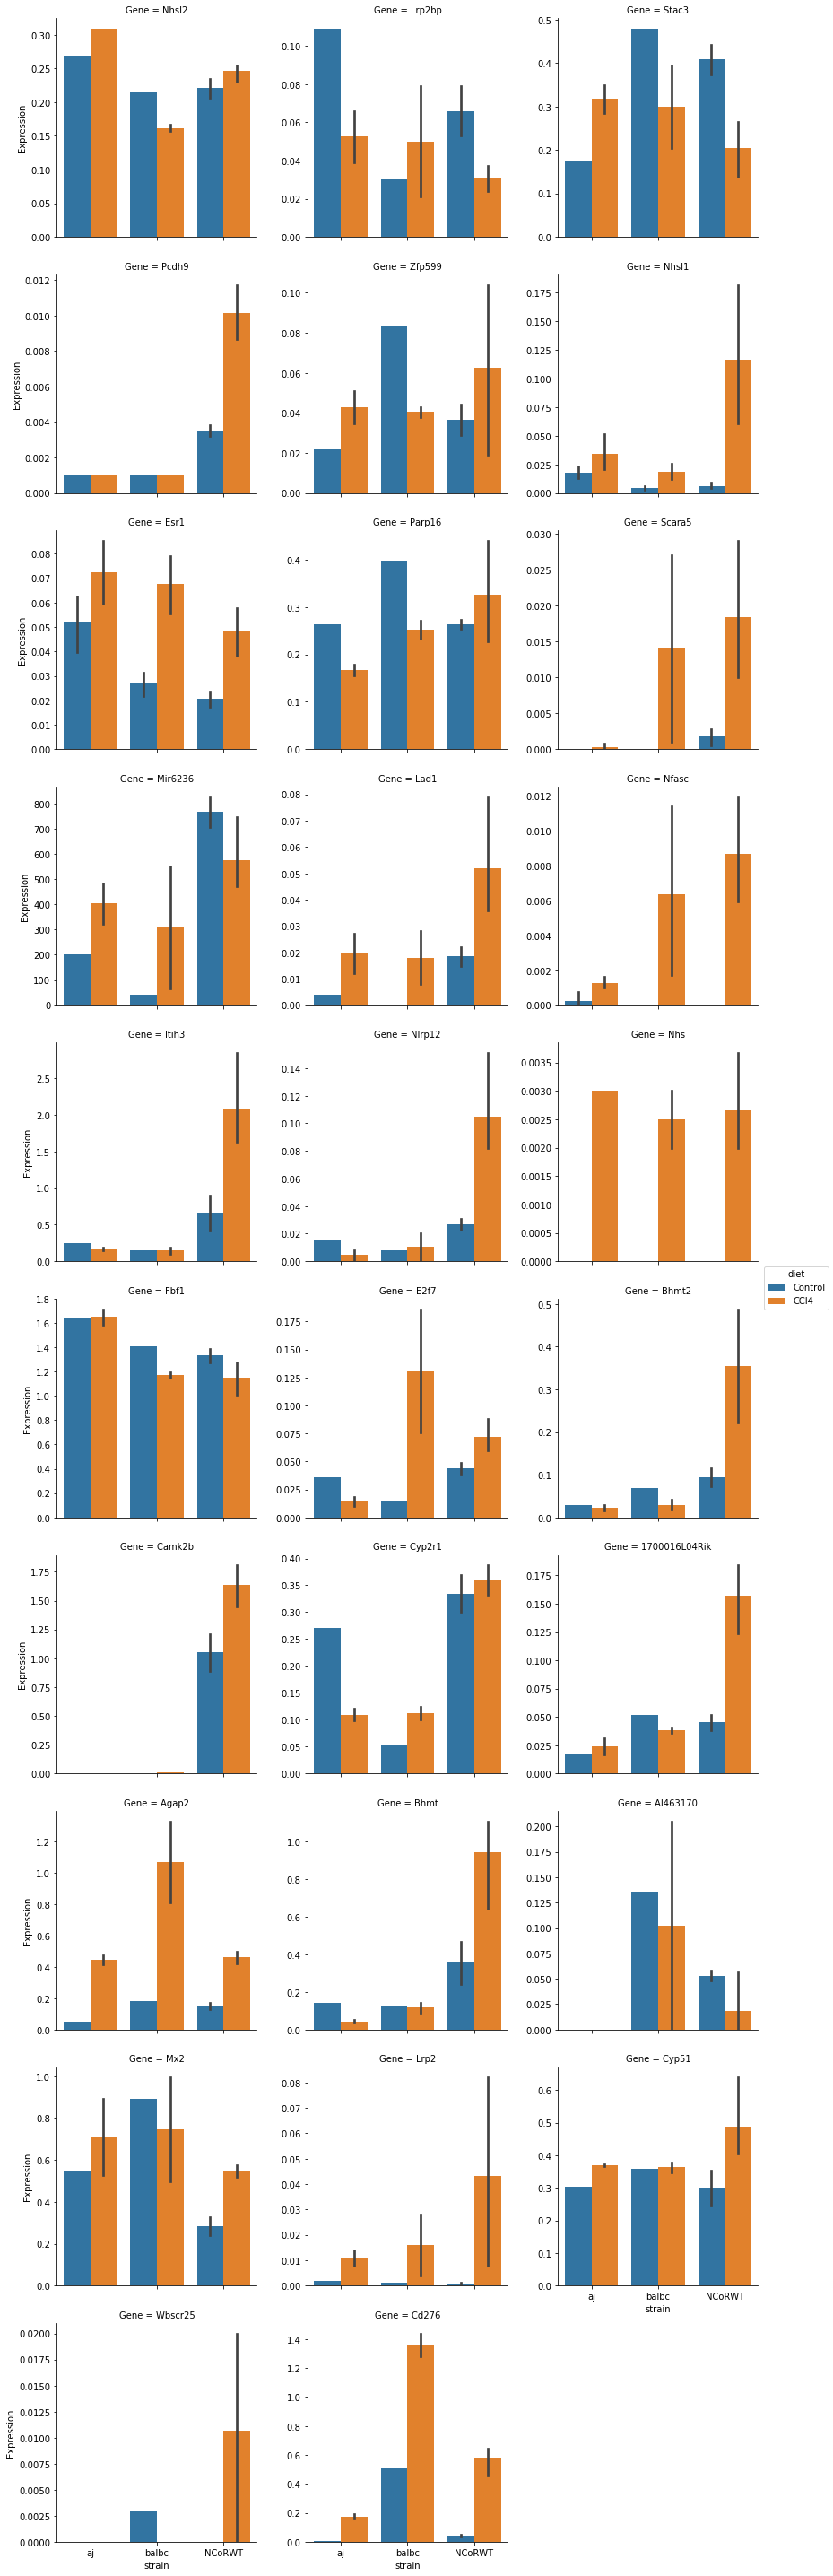

In [387]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + aj_spec_genes))

#### NCoRWT (C57 BL6) specific genes

In [389]:
ncorwt_ccl4 = pd.read_csv(outdir + "/ncorwt_ccl4_wholeliver_deseq_results.txt")
ncorwt_aj = pd.read_csv(outdir + "/aj_ncorwt_ccl4_interaction_wholeliver_deseq_results.txt")
ncorwt_balb = pd.read_csv(outdir + "/balbc_ncorwt_ccl4_interaction_wholeliver_deseq_results.txt")

In [390]:
# combine into one DF
ncorwt = ncorwt_ccl4.merge(ncorwt_balb.merge(ncorwt_aj, how='outer', on='Unnamed: 0',
                                             suffixes=('_ncorwt_balb', '_ncorwt_aj')), 
                           how='outer', on='Unnamed: 0')

In [391]:
ncorwt_balb_spec = ((np.abs(ncorwt.log2FoldChange) >= 1) & (ncorwt.padj <=0.05) & (ncorwt.padj_ncorwt_balb <= 0.05))
ncorwt_balb_spec.value_counts()

False    33755
True      1990
dtype: int64

In [392]:
ncorwt_aj_spec = ((np.abs(ncorwt.log2FoldChange) >= 1) & (ncorwt.padj <=0.05) & (ncorwt.padj_ncorwt_aj <= 0.05))
ncorwt_aj_spec.value_counts()

False    33667
True      2078
dtype: int64

In [393]:
(ncorwt_aj_spec & ncorwt_balb_spec).value_counts()

False    34304
True      1441
dtype: int64

In [394]:
# ncorwt specific refseq ids
ncorwt_spec_refseq = ncorwt.loc[((ncorwt_balb_spec) & (ncorwt_aj_spec)), 'Unnamed: 0']

# Get ncorwt spec gene names
ncorwt_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(ncorwt_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

#### Kupffer cell expression

Could not assign subject groups, using Sample IDs


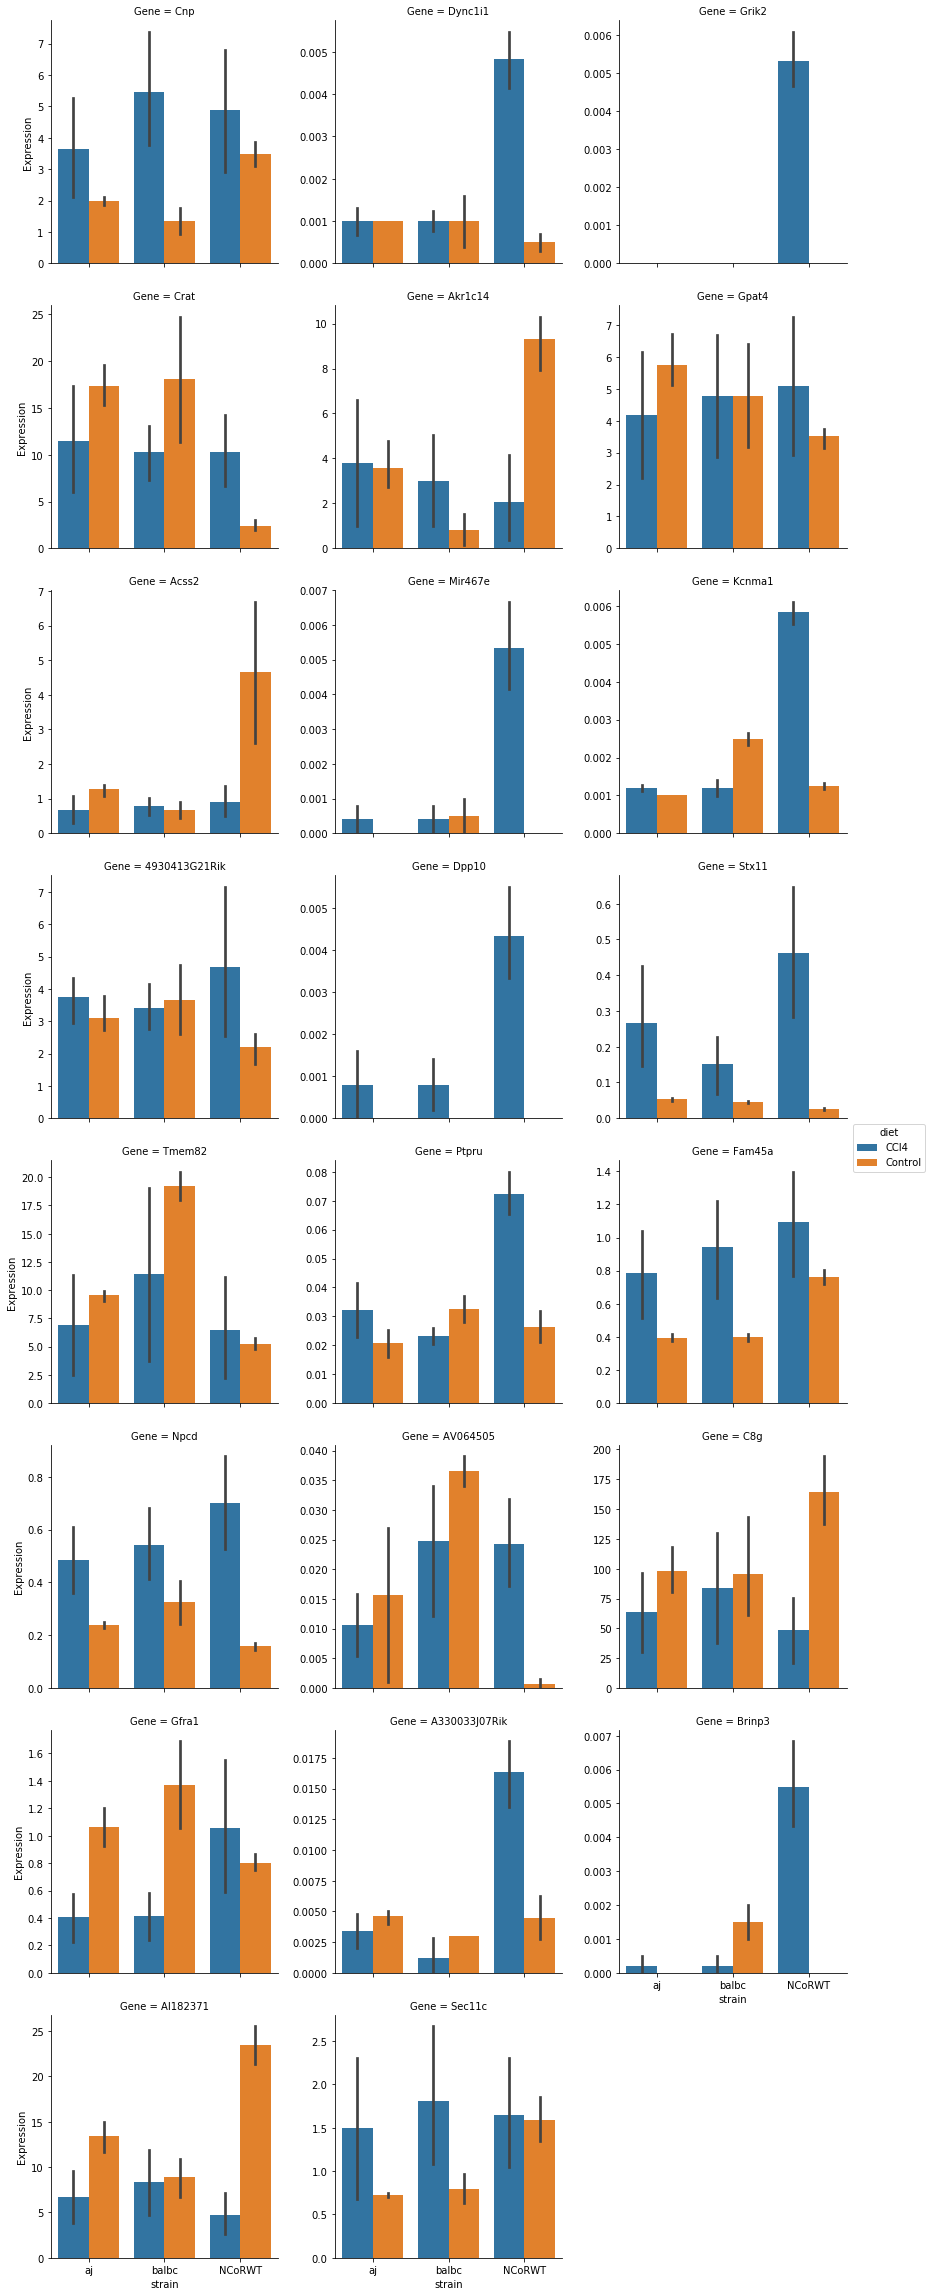

In [395]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + ncorwt_spec_genes[:24] + '\|'))

#### liver expression


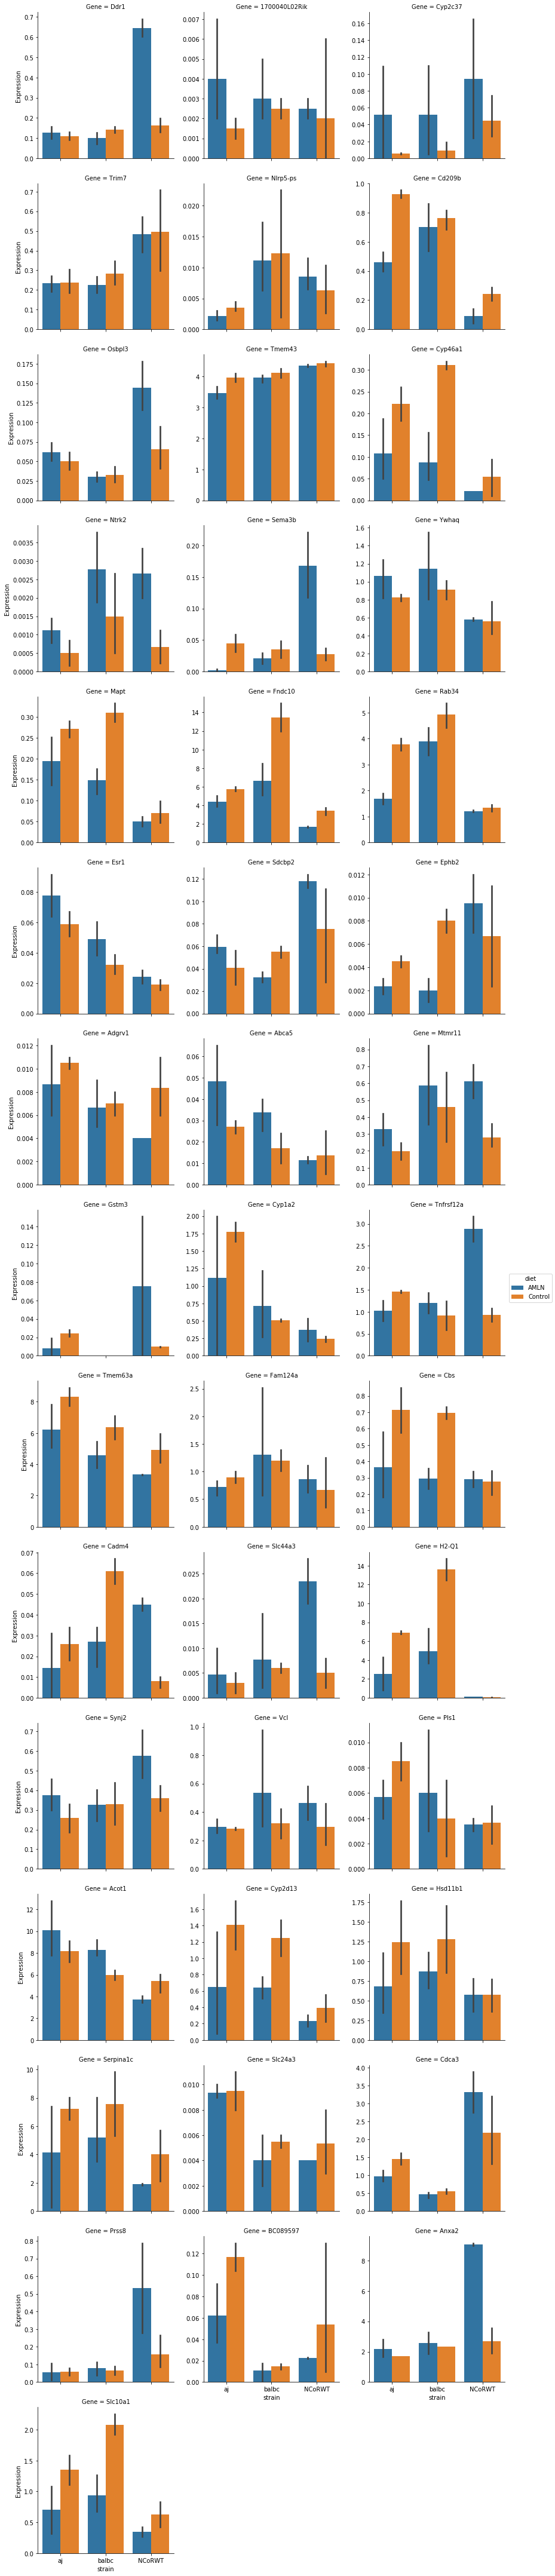

In [78]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + ncorwt_spec_genes[:24] + '\|'))